##Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

In [1]:
#Library imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#EDA process

#Checking Percentage of null|na values in column
(((data.isnull() | data.isna()).sum() * 100) / data.index.size).loc[lambda x : x>0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [6]:
# Dropping 'PoolQC','MiscFeature','Alley','Fence' since columns has more then 80% values null|na
data.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace = True)

In [7]:
#Checking data in columns having null values
for i in ['FireplaceQu','LotFrontage','GarageType','GarageYrBlt','GarageFinish',
          'GarageQual','GarageCond','BsmtExposure','BsmtFinType2','BsmtQual',
            'BsmtCond','BsmtFinType1','MasVnrType','MasVnrArea','Electrical']:
    print(i,data[i].unique())

FireplaceQu [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
LotFrontage [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 19

In [8]:
#Based on data_description setting default values
data['FireplaceQu'] = data['FireplaceQu'].fillna('NA')
data['LotFrontage'] = data['LotFrontage'].fillna(0)
data['GarageType'] = data['GarageType'].fillna('NA')
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)
data['GarageFinish'] = data['GarageFinish'].fillna('NA')
data['GarageQual'] = data['GarageQual'].fillna('NA')
data['GarageCond'] = data['GarageCond'].fillna('NA')
data['BsmtExposure'] = data['BsmtExposure'].fillna('NA')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('NA')
data['BsmtQual'] = data['BsmtQual'].fillna('NA')
data['BsmtCond'] = data['BsmtCond'].fillna('NA')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('NA')
data['MasVnrType'] = data['MasVnrType'].fillna('None')
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
data['Electrical'] = data['Electrical'].fillna('NA')

In [9]:
#Checking null values if any after defaults
(((data.isnull() | data.isna()).sum() * 100) / data.index.size).loc[lambda x : x>0].sort_values(ascending=False)

Series([], dtype: float64)

In [10]:
#Checking data type
data.select_dtypes(include=['number']).describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
print(data.Id.duplicated().sum()) #checking if any duplicate rows based on id column

0


In [12]:
data.select_dtypes(include=['number']).describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
#Converting Year columns into difference Since max value is 2010 
year_columns = ['YrSold','GarageYrBlt','YearRemodAdd','YearBuilt']
data['YearBuilt_age'] = data.YearBuilt.max()-data.YearBuilt
data['YearRemodAdd_age'] = data.YearRemodAdd.max()-data.YearRemodAdd
data['GarageYrBlt_age'] = data.GarageYrBlt.max()-data.GarageYrBlt
data['YrSold_age'] = data.YrSold.max()-data.YrSold
data.drop(year_columns,axis=1,inplace = True)
data.select_dtypes(include=['number']).describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890,38.732192,25.134247,141.260274,2.184247
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883,30.202904,20.645407,453.697295,1.328095
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,10.000000,6.000000,9.000000,1.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,37.000000,16.000000,33.000000,2.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,56.000000,43.000000,52.000000,3.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000,138.000000,60.000000,2010.000000,4.000000


In [14]:
#dropping MoSold since the month sold is insignificant
#Dropping Id column since its just unique identity number
data.drop(['Id','MoSold'],axis=1,inplace = True)

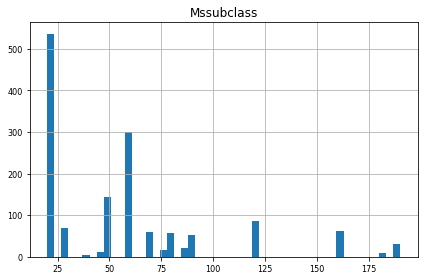

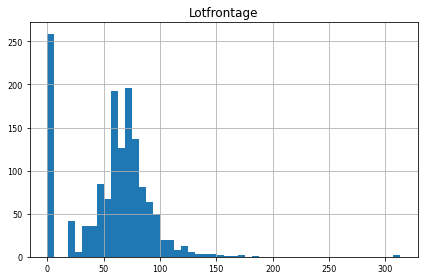

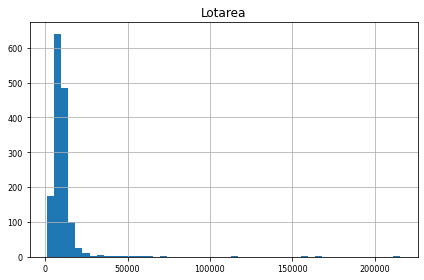

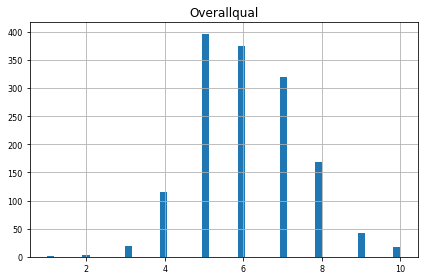

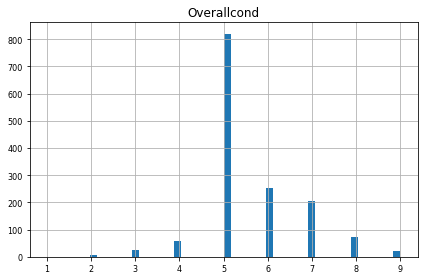

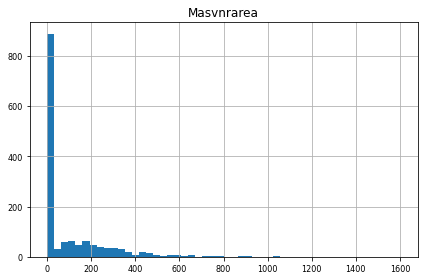

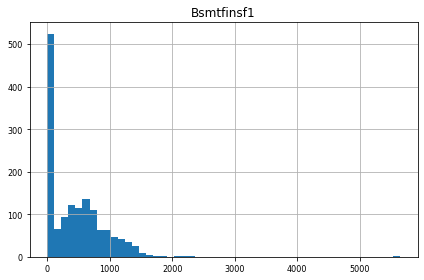

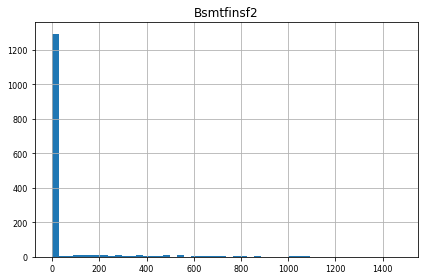

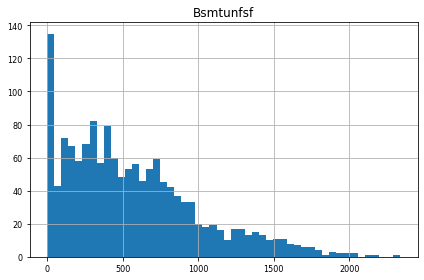

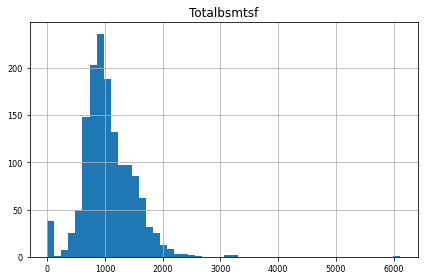

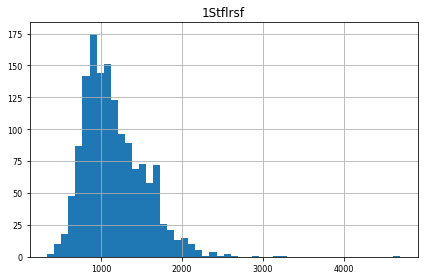

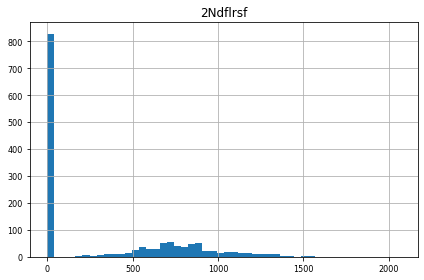

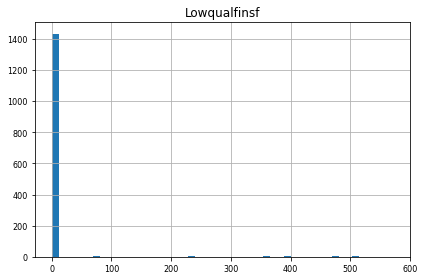

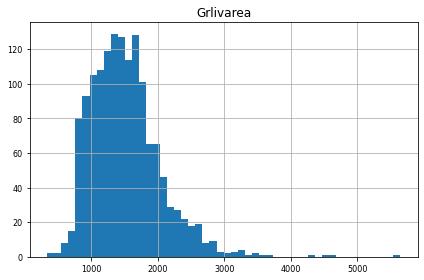

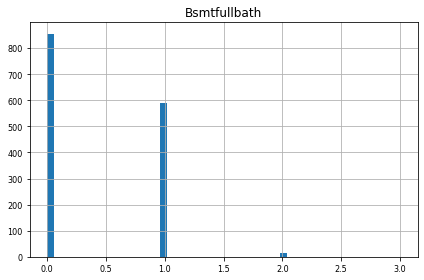

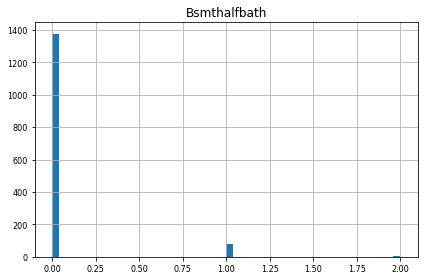

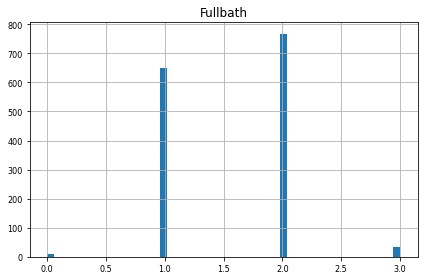

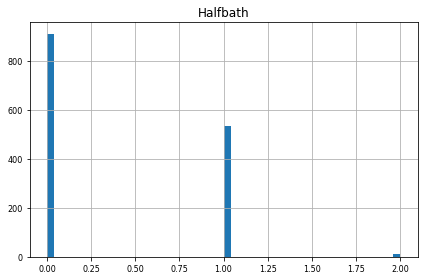

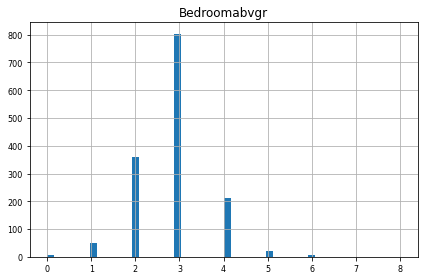

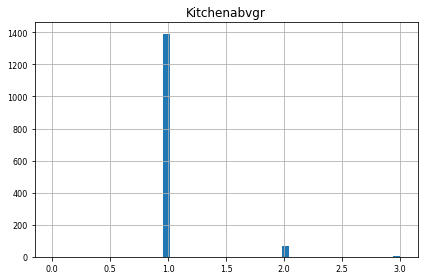

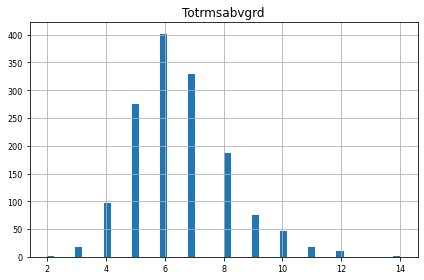

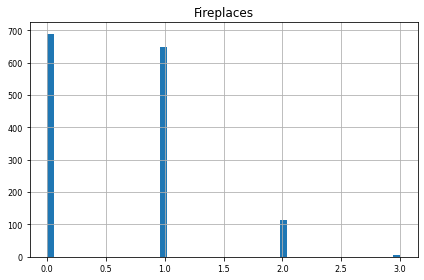

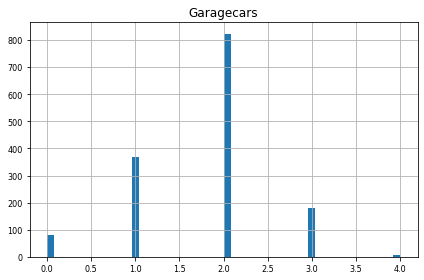

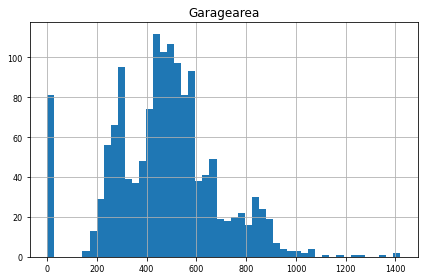

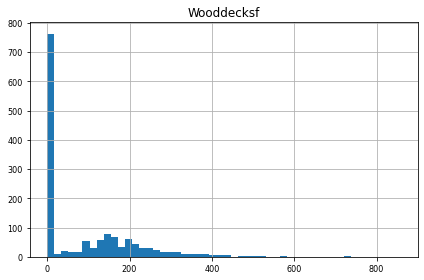

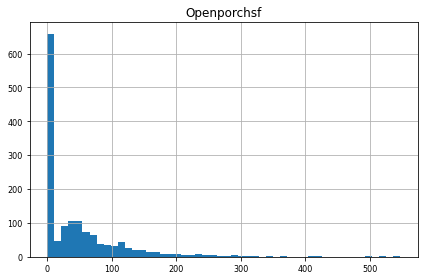

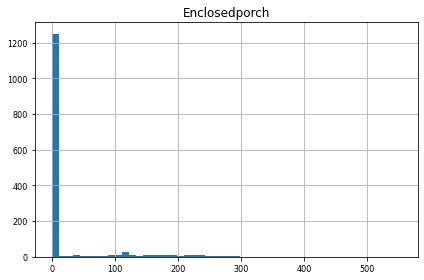

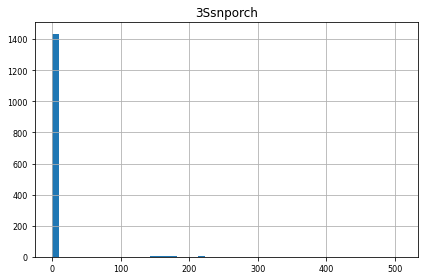

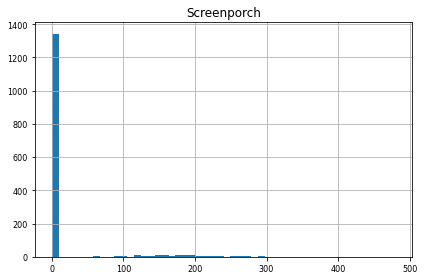

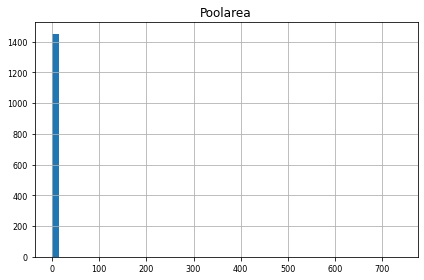

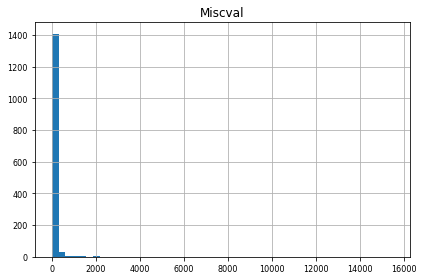

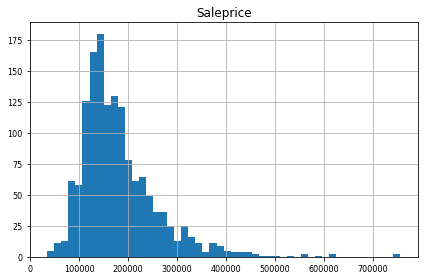

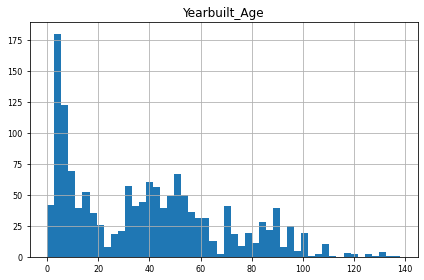

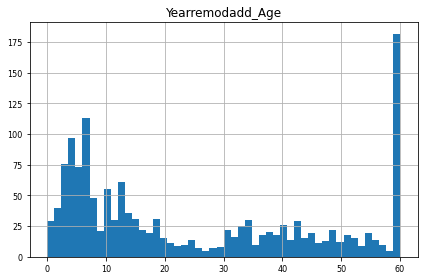

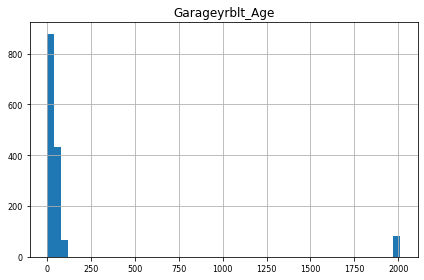

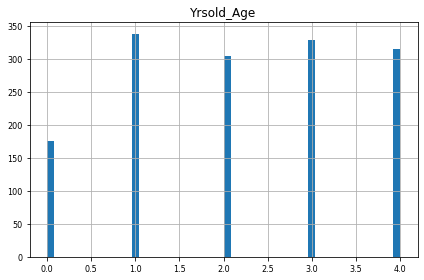

In [15]:
#Checking hist diagram of all number columns
nrow = indx = 1

def plotHistChart(i):
    plt.subplot(1,1,1)
    ax = data[i].hist(bins=50, xlabelsize=8, ylabelsize=8)
    ax.set_title(i.title())
    plt.tight_layout()
    plt.show()
    
for i in data.select_dtypes(include=['number']):
    plotHistChart(i)

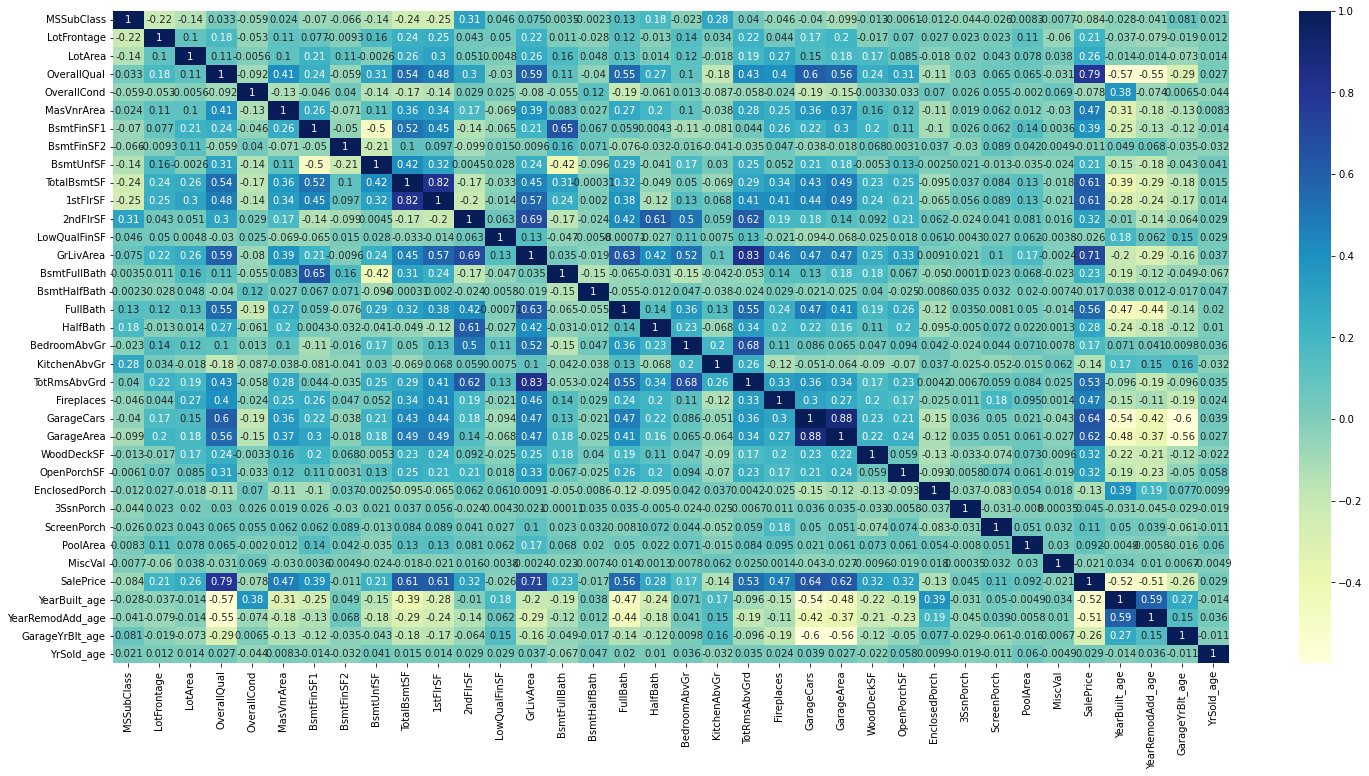

In [16]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(25,12))

# heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

#OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF has positive correlation with SalesPrice

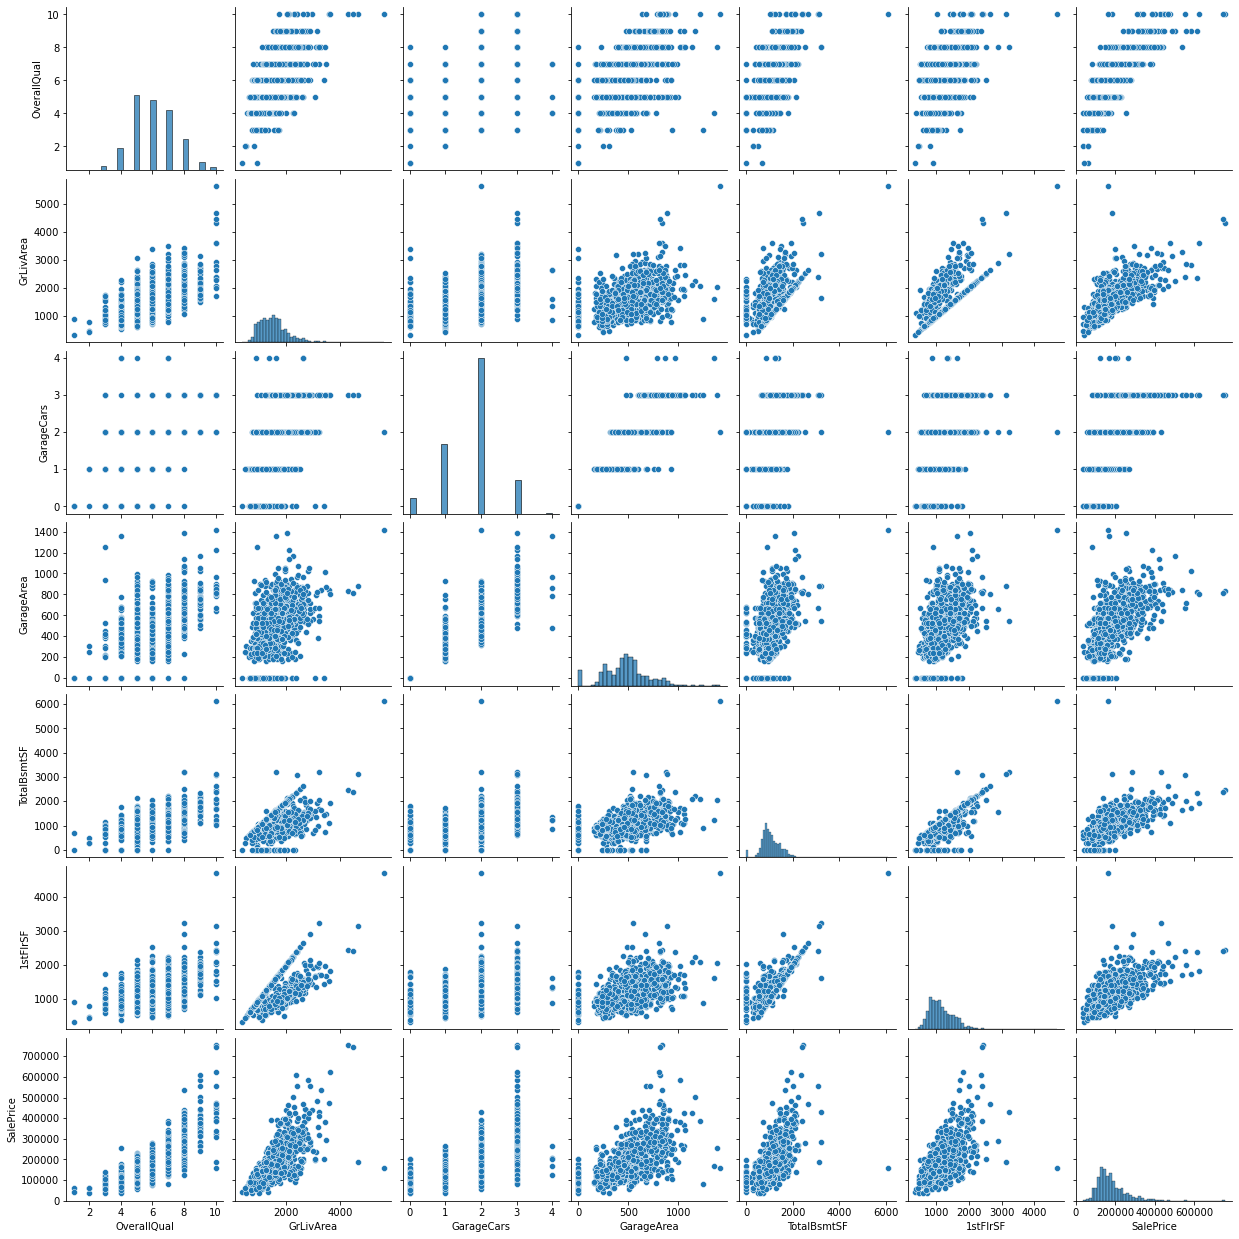

In [17]:
# visualising the numerical variables having good correlation
sns.pairplot(data[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','SalePrice']])
plt.show()

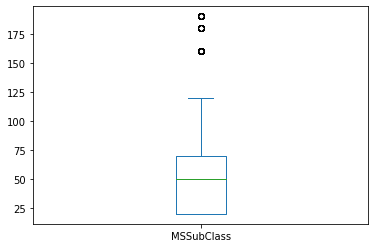

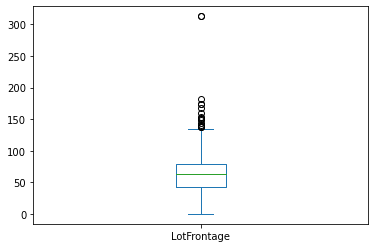

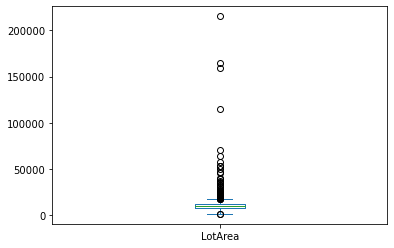

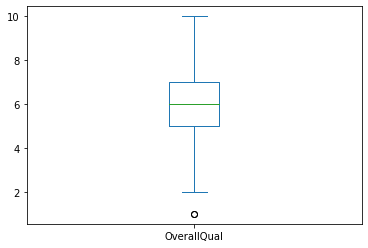

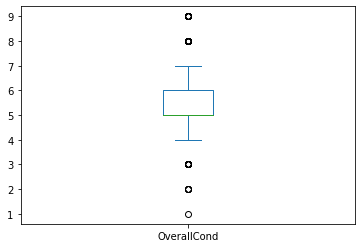

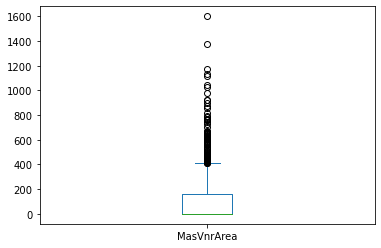

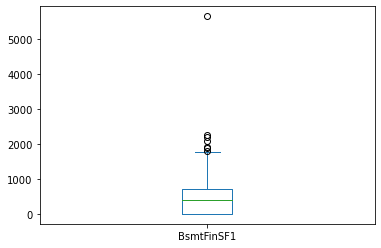

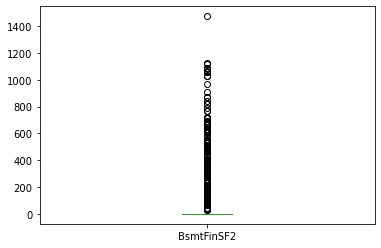

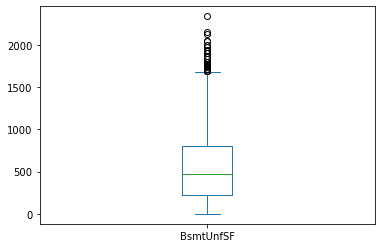

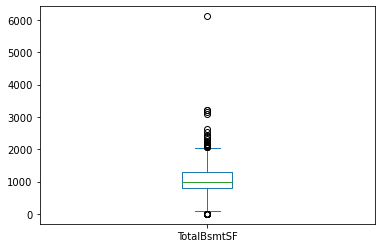

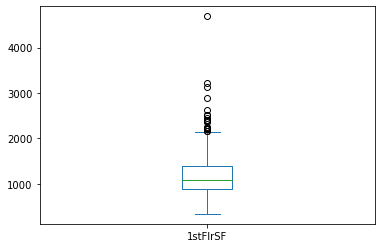

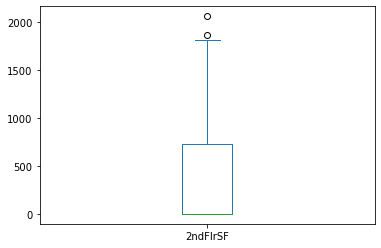

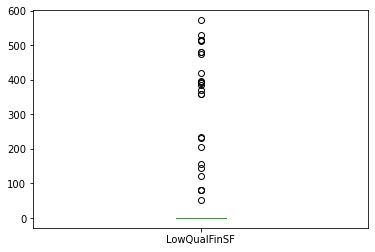

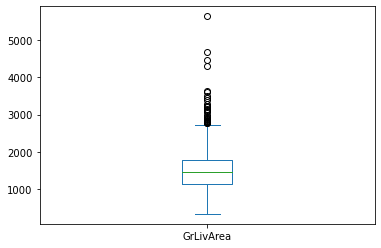

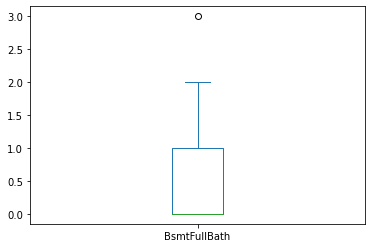

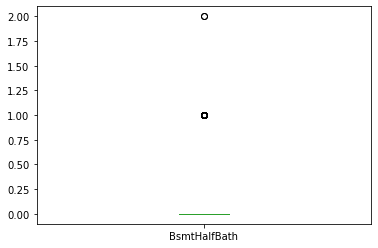

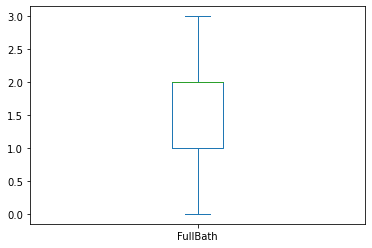

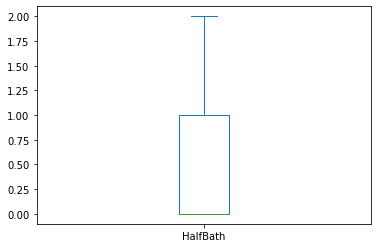

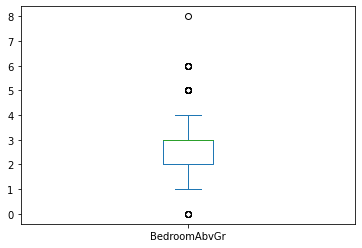

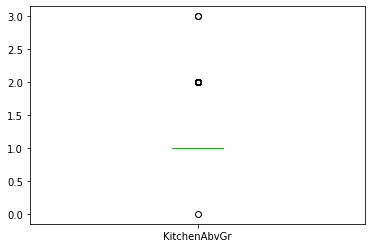

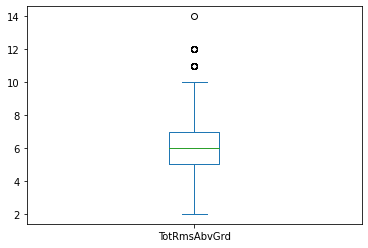

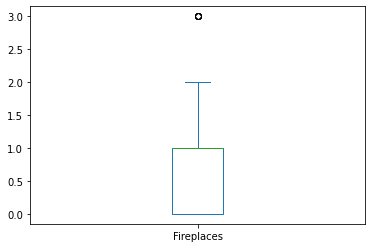

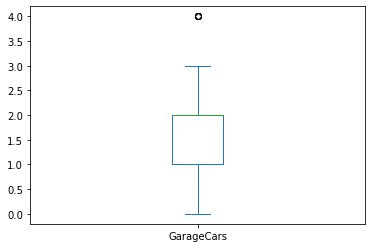

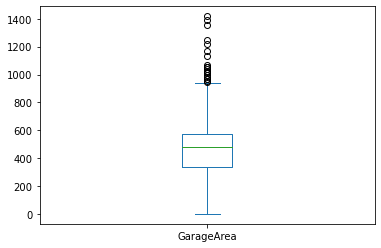

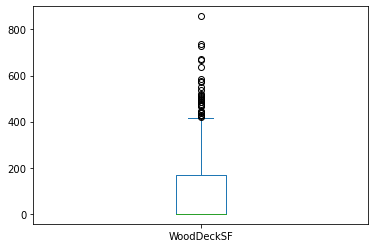

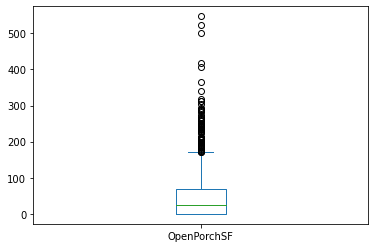

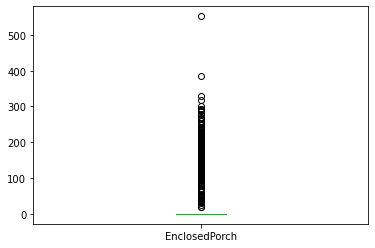

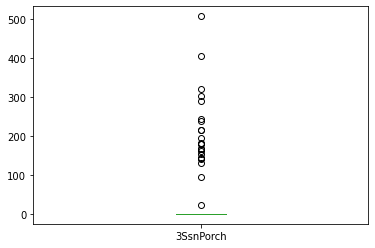

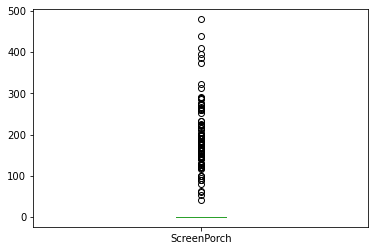

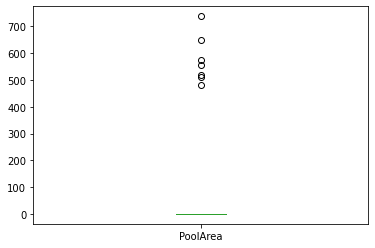

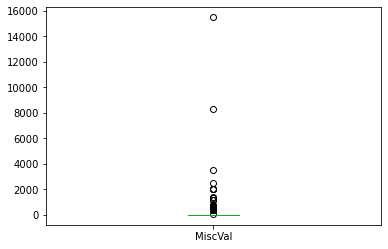

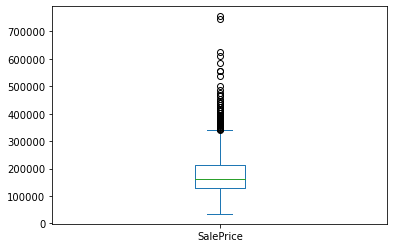

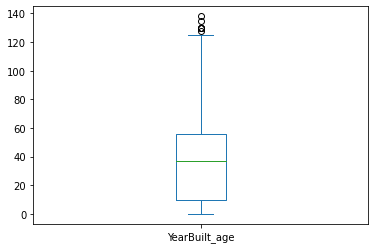

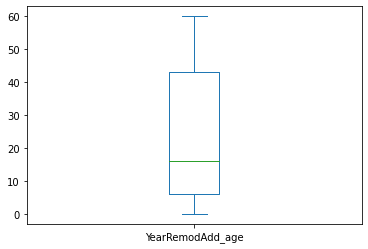

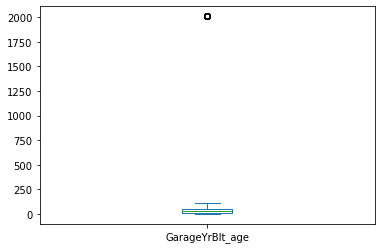

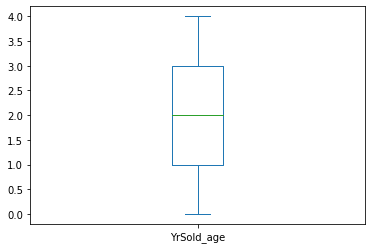

In [18]:
#Check Outliers for number columns
for i in data.select_dtypes(include=['number']).columns:
    data[i].plot.box()
    plt.show()

In [19]:
#Removing outliers rows
cols = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.99)
IQR = Q3 - Q1

data = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [20]:
#checking Object data type 
data.select_dtypes(include=['object']).describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441
unique,5,2,4,4,2,5,3,25,9,7,5,8,6,7,15,16,4,4,5,6,5,5,5,7,7,6,5,2,6,4,7,6,7,4,6,6,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NA,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1133,1436,916,1297,1440,1043,1367,221,1246,1427,1204,719,1131,1417,513,503,860,896,1269,642,641,1294,946,427,1245,1410,732,1347,1315,727,1343,687,856,600,1294,1309,1323,1249,1183


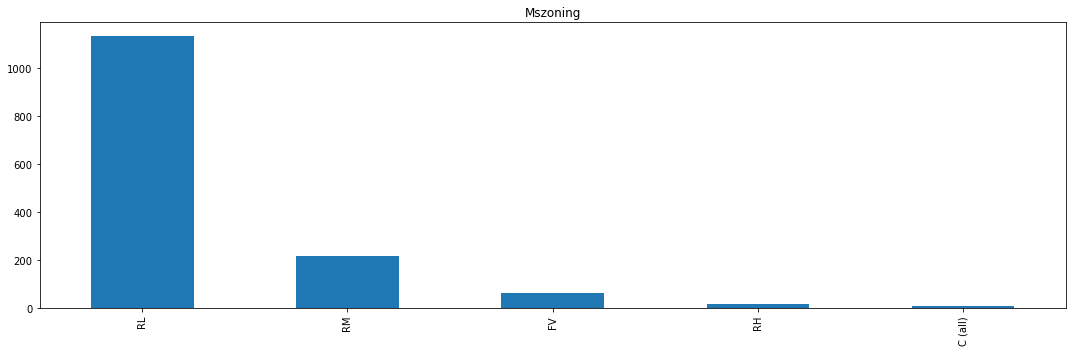

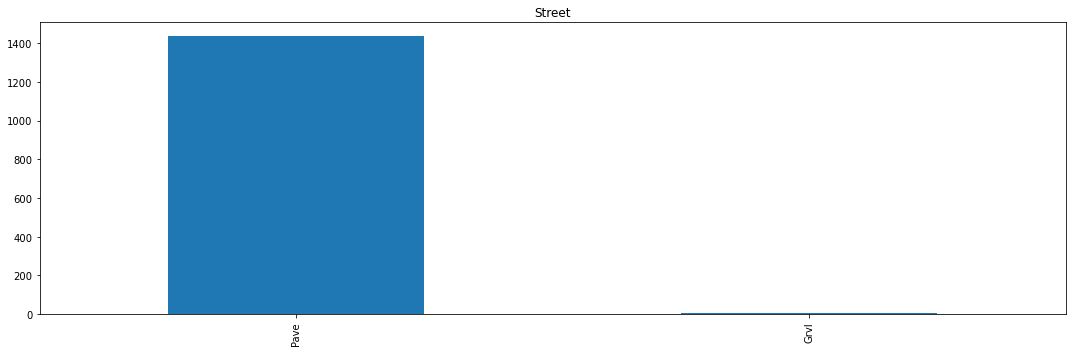

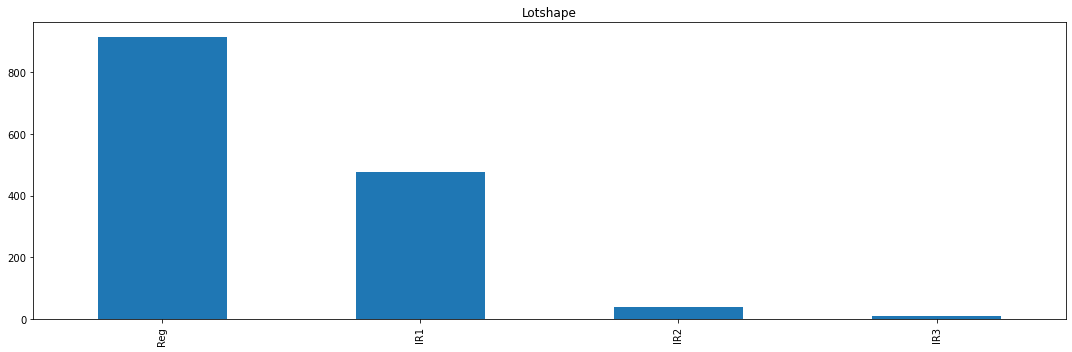

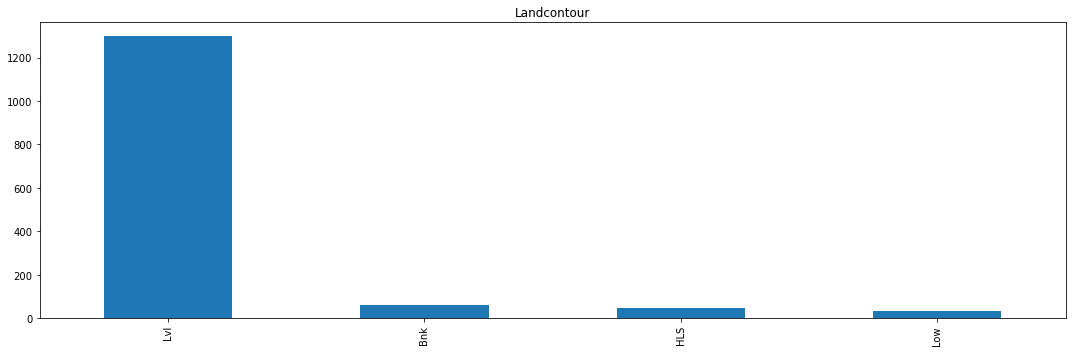

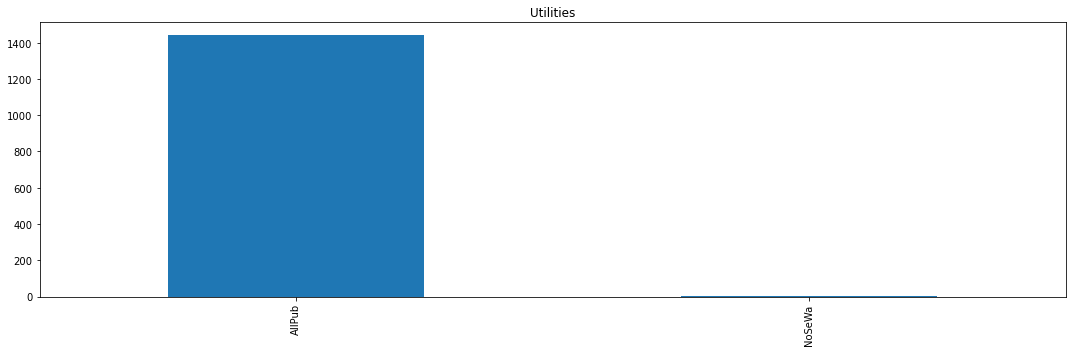

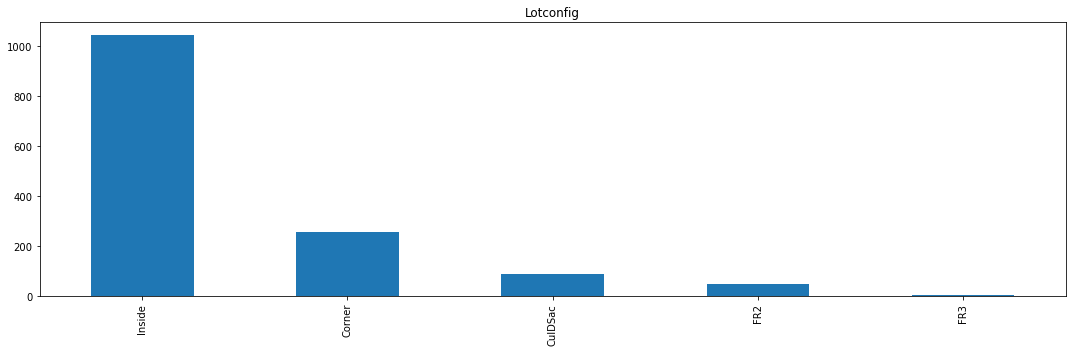

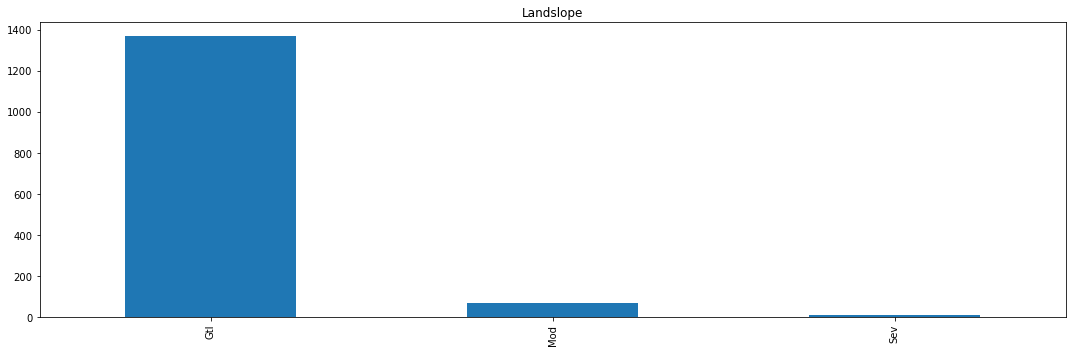

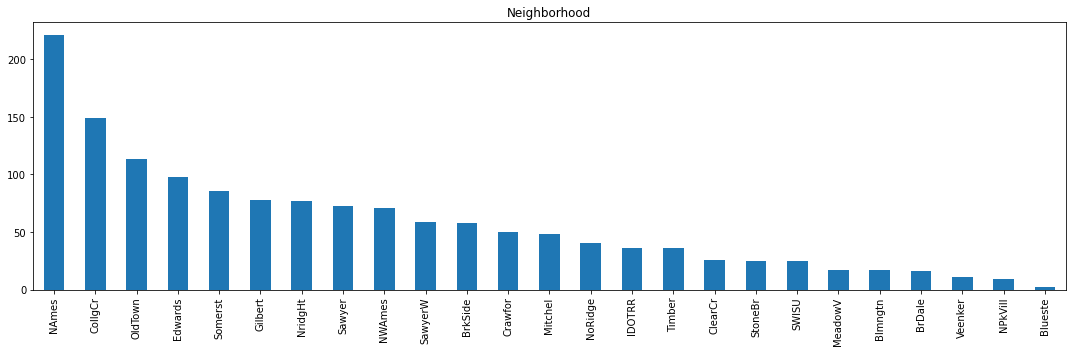

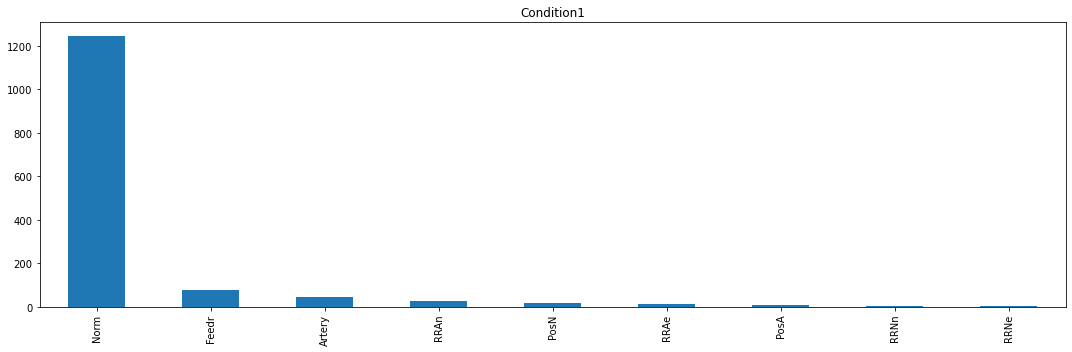

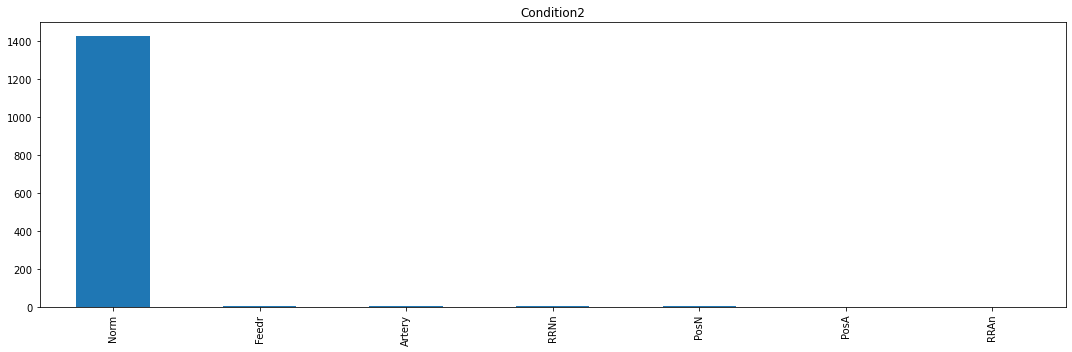

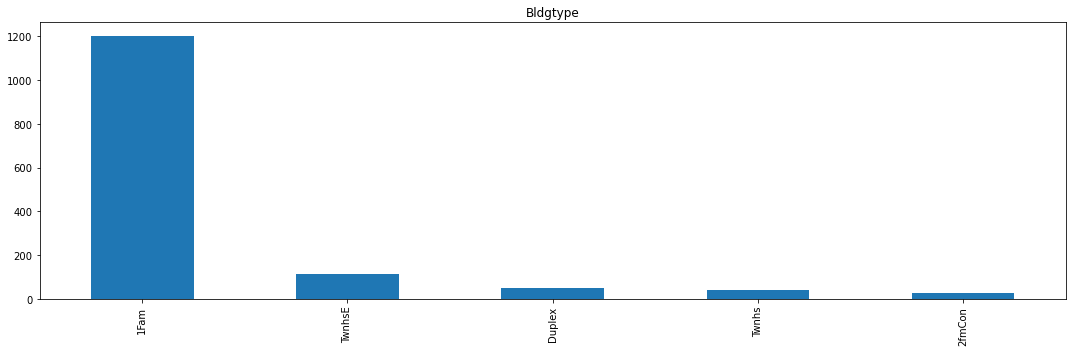

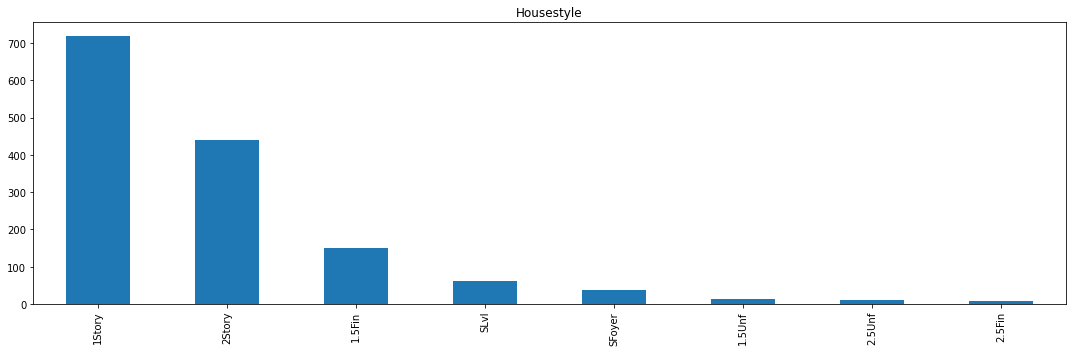

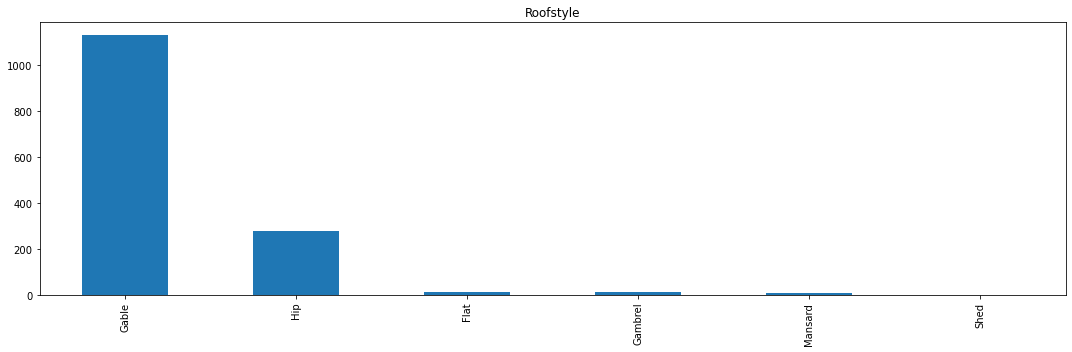

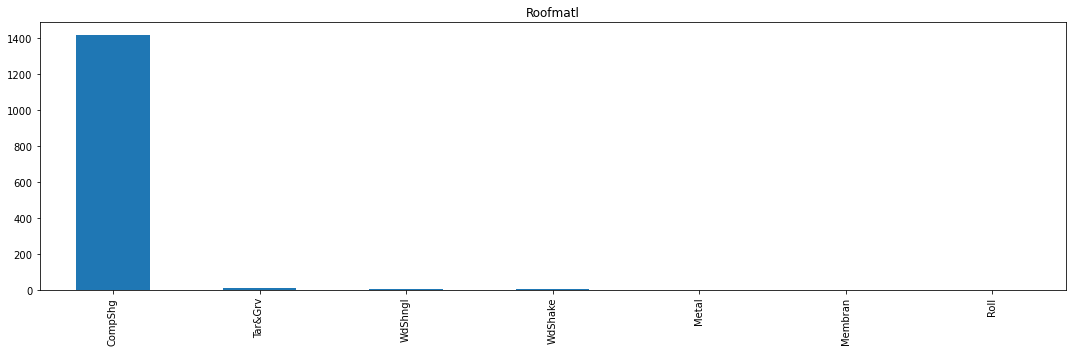

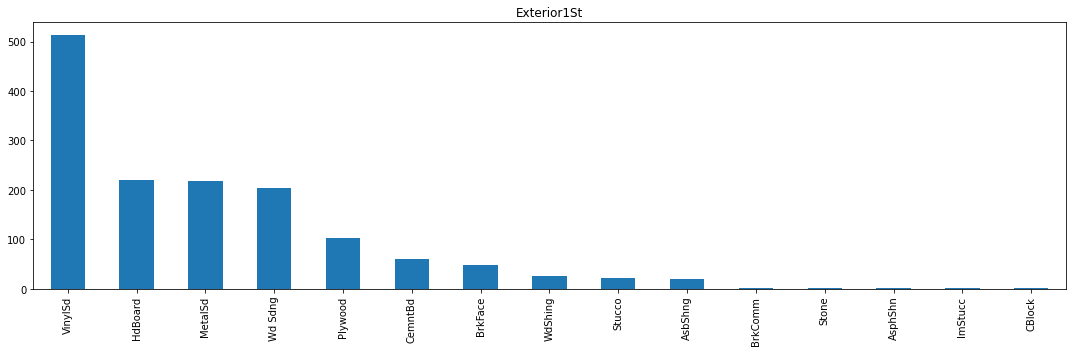

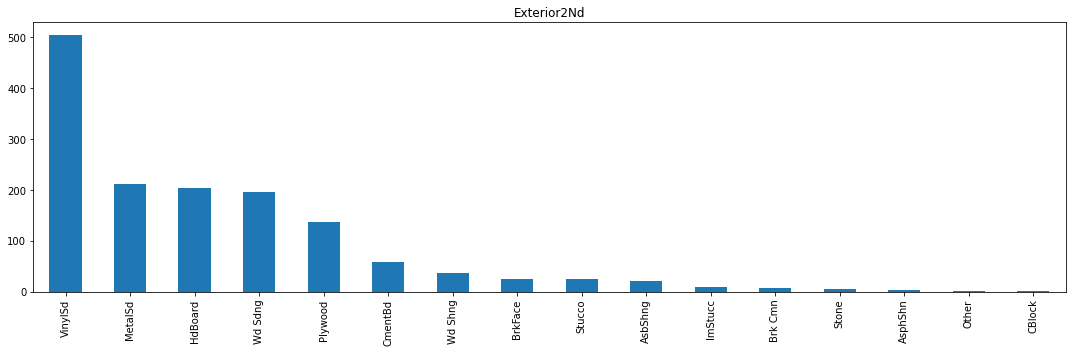

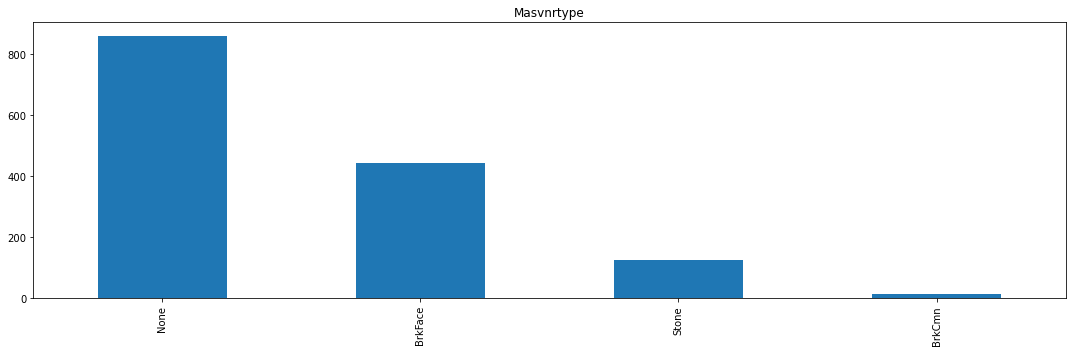

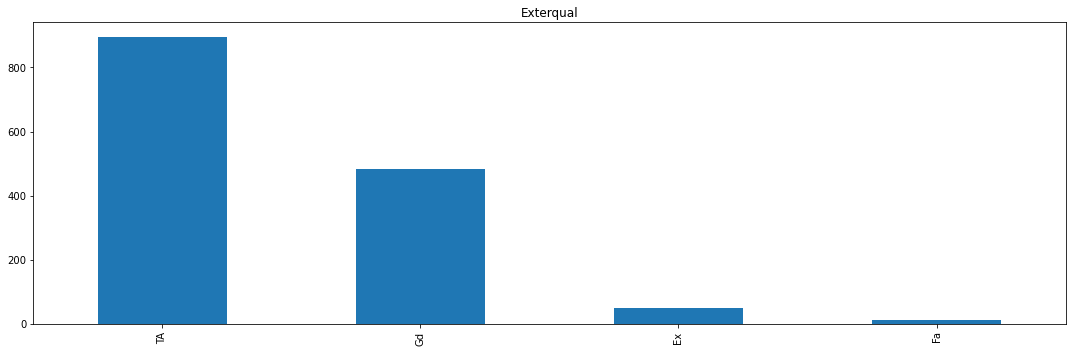

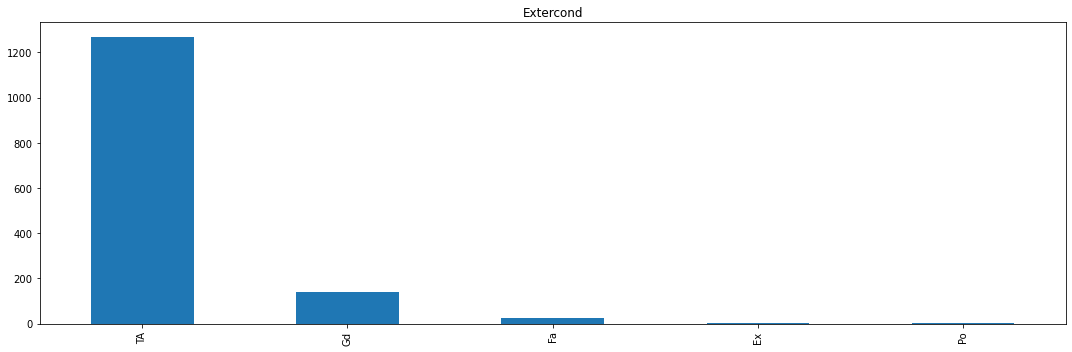

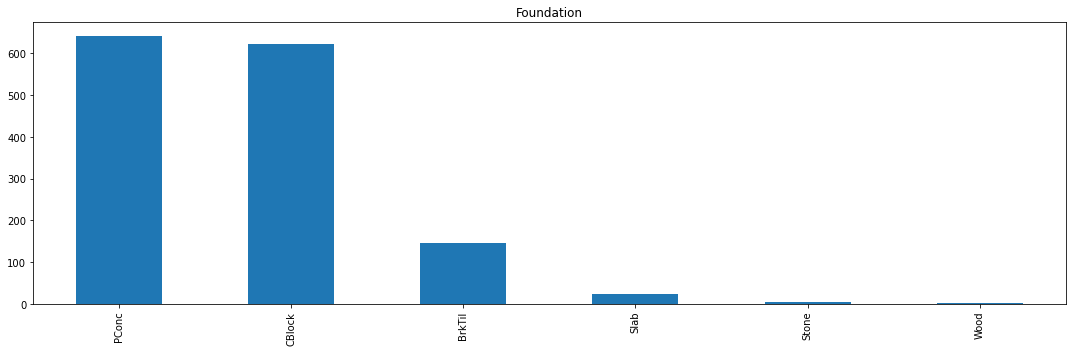

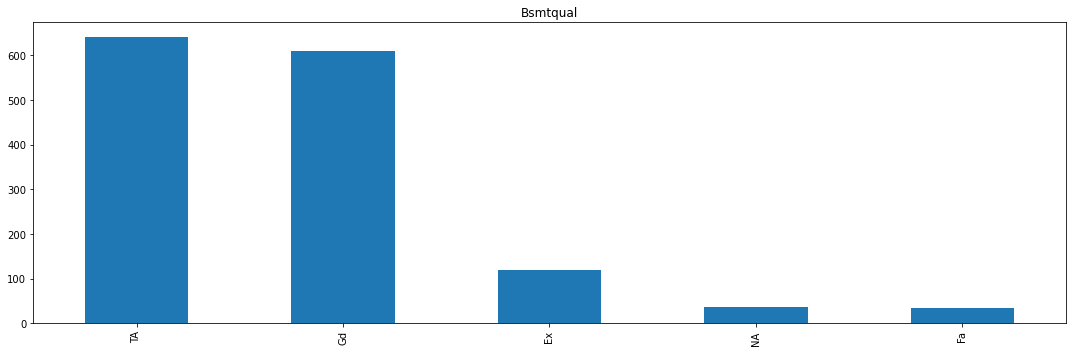

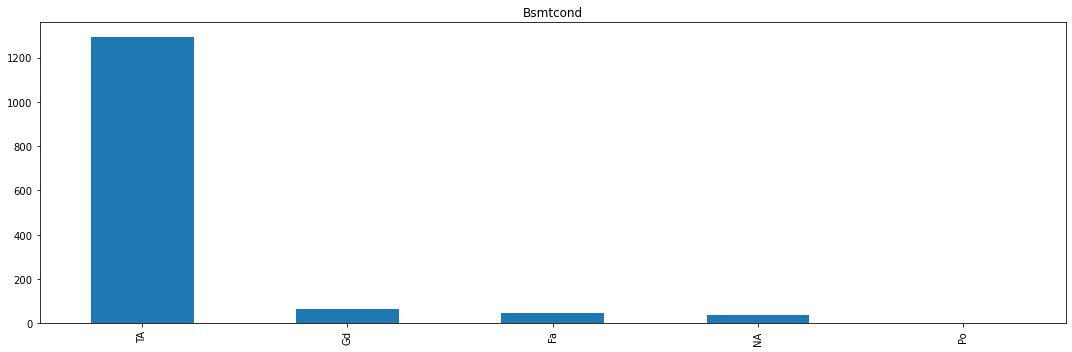

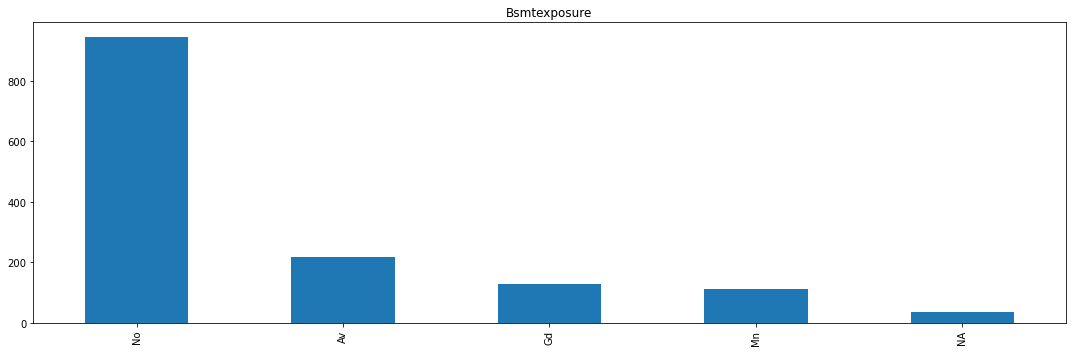

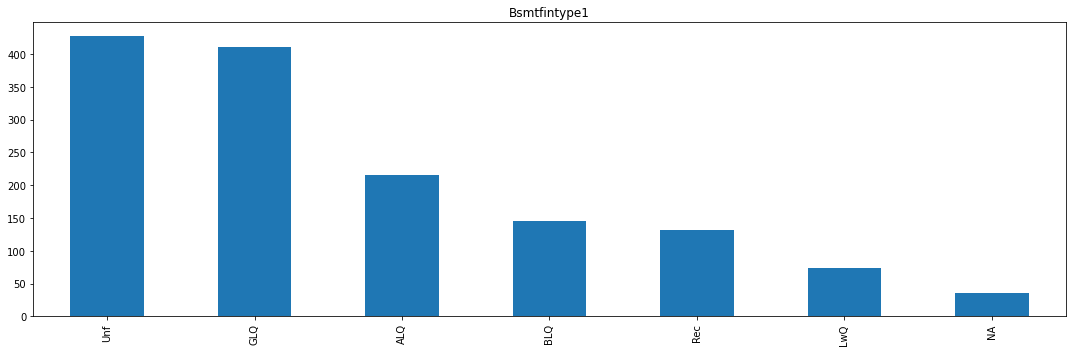

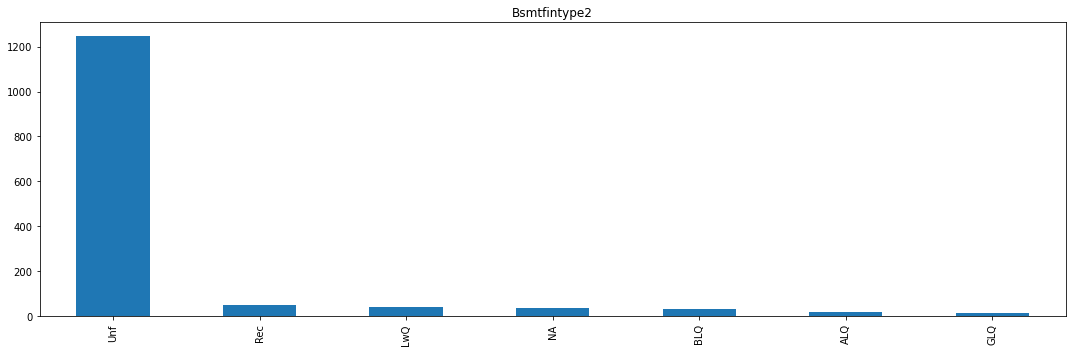

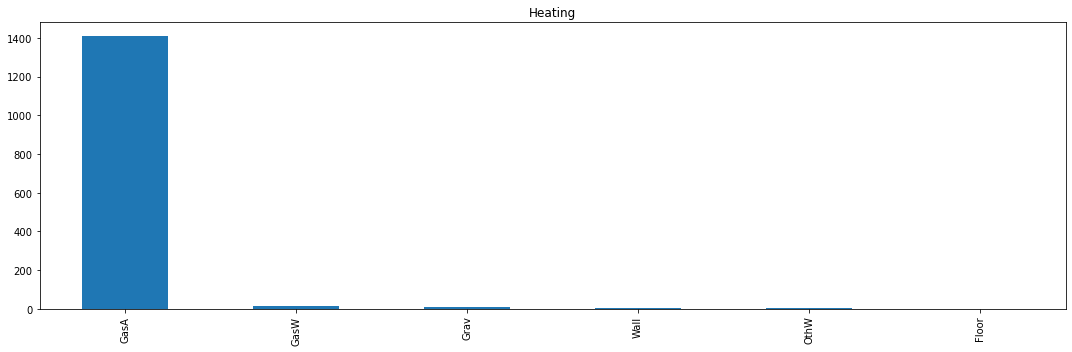

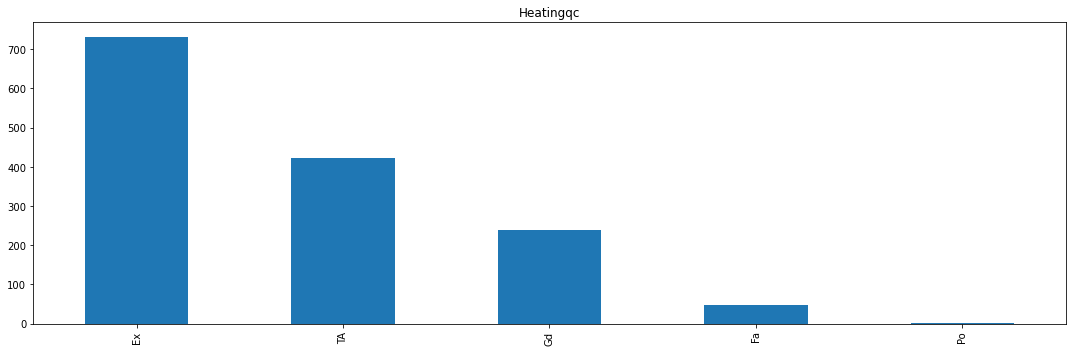

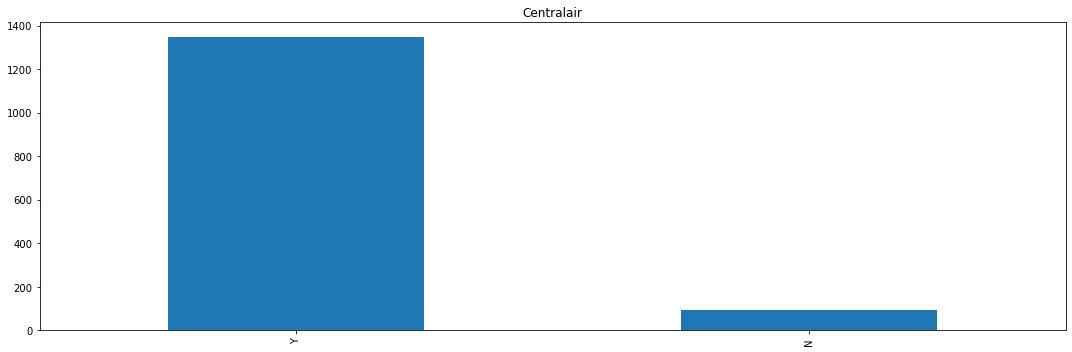

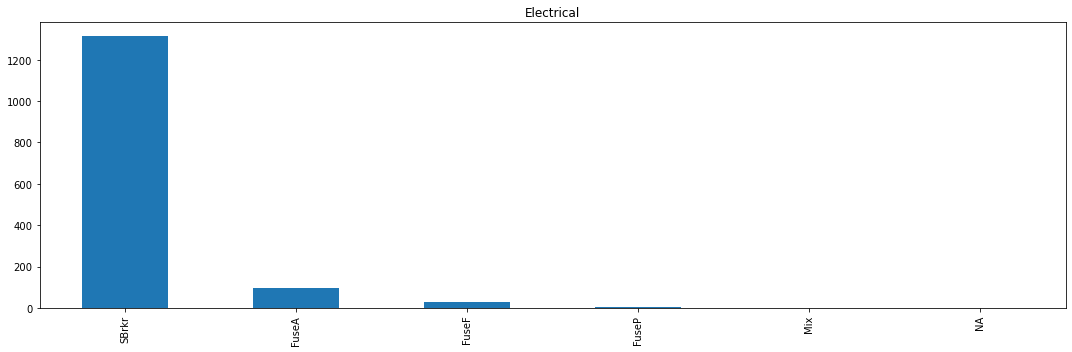

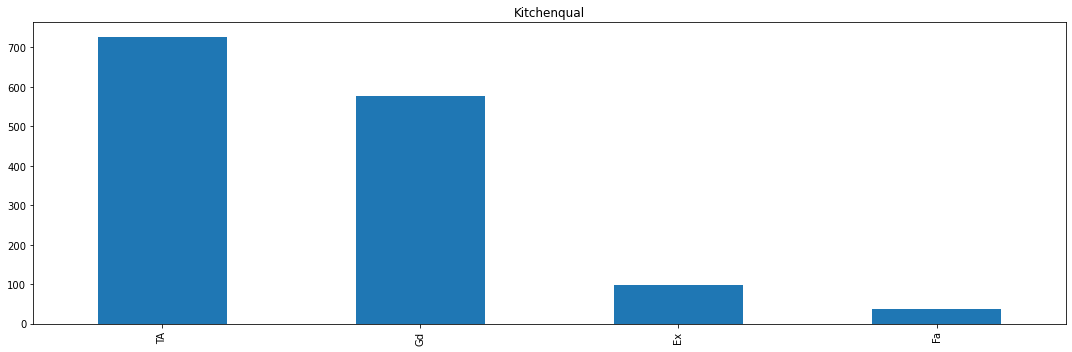

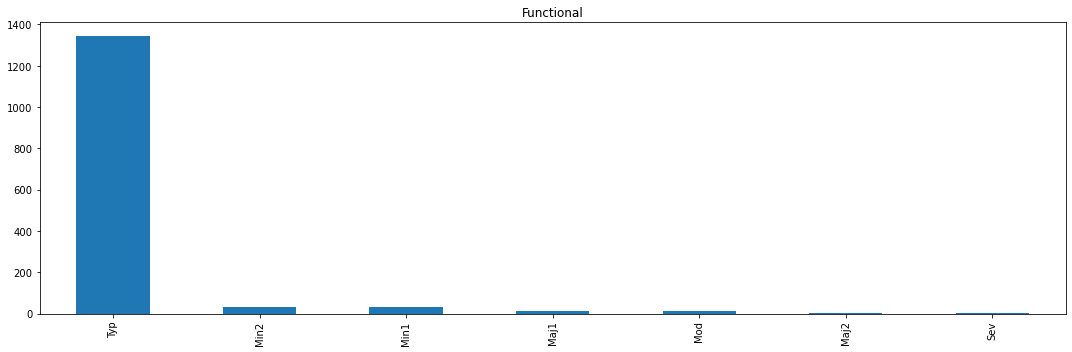

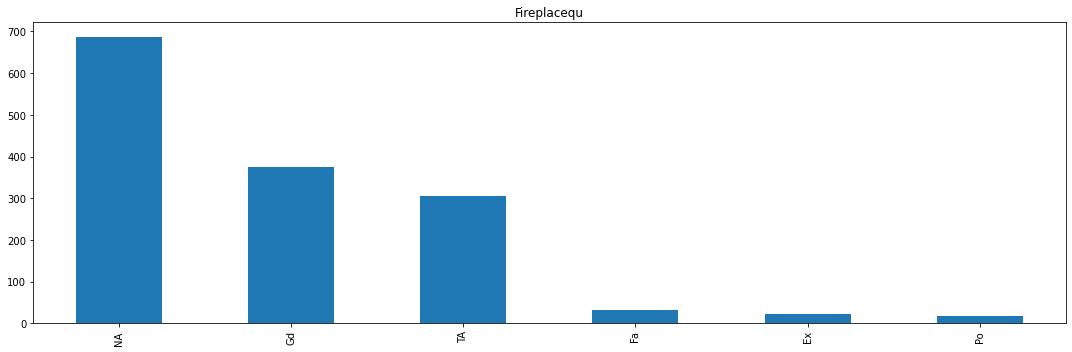

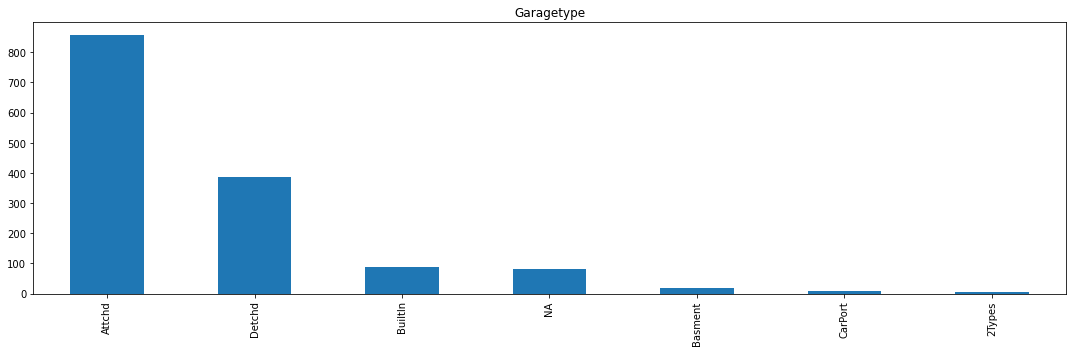

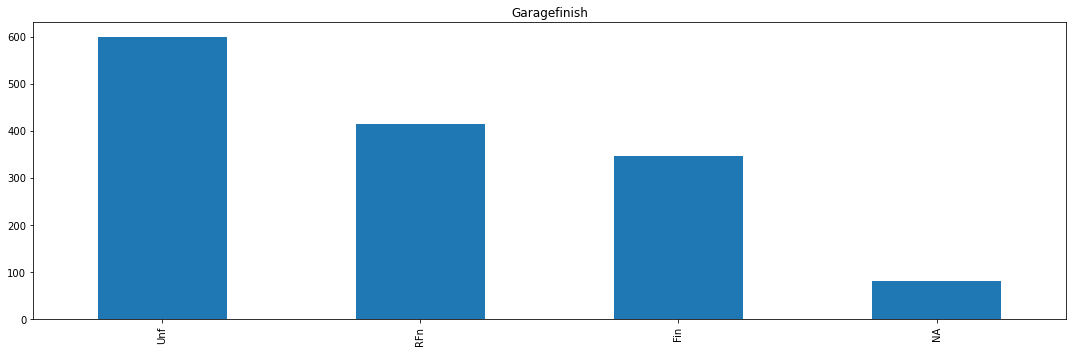

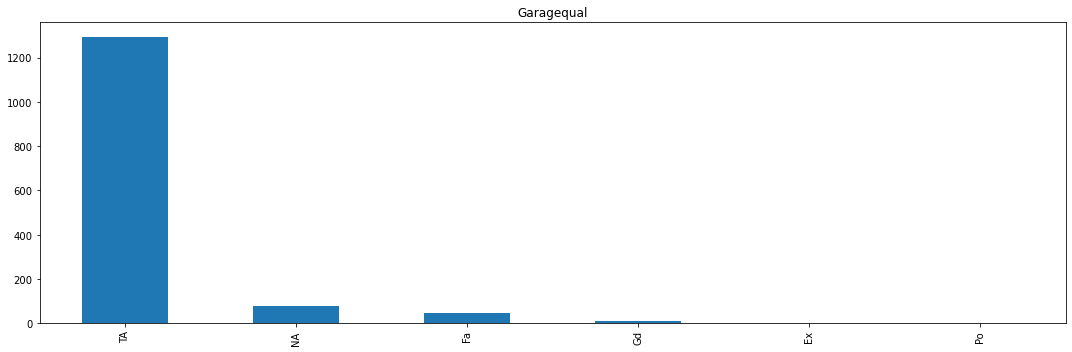

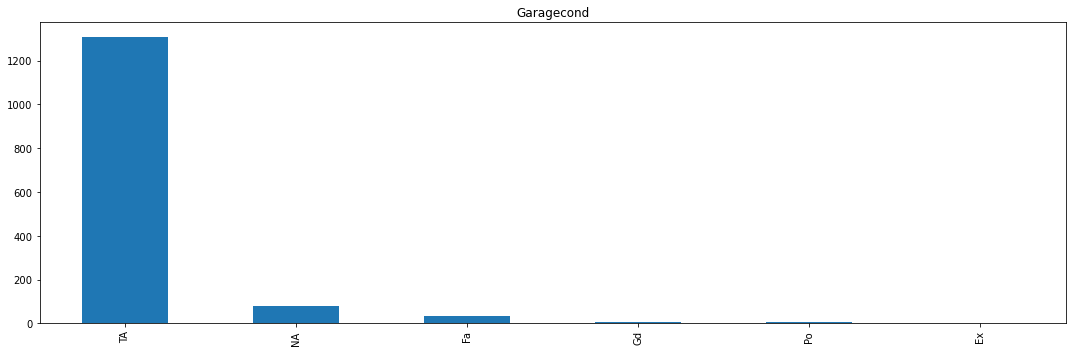

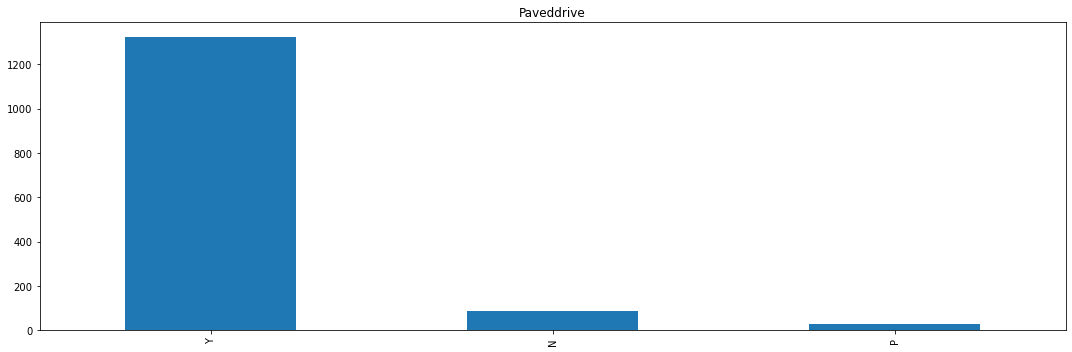

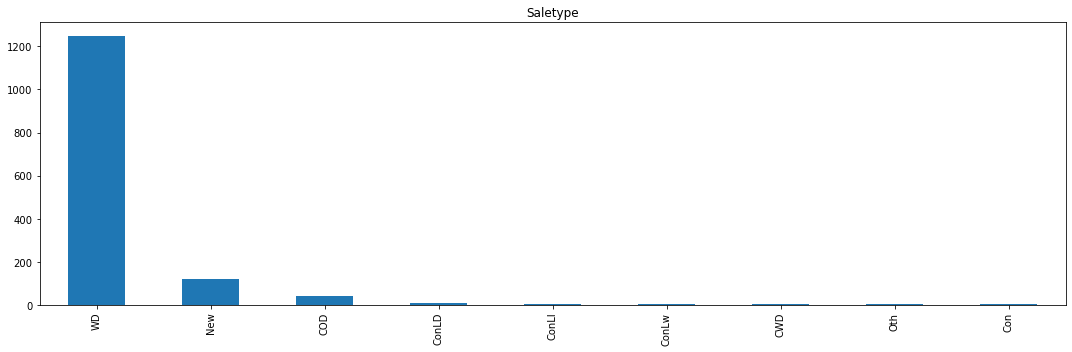

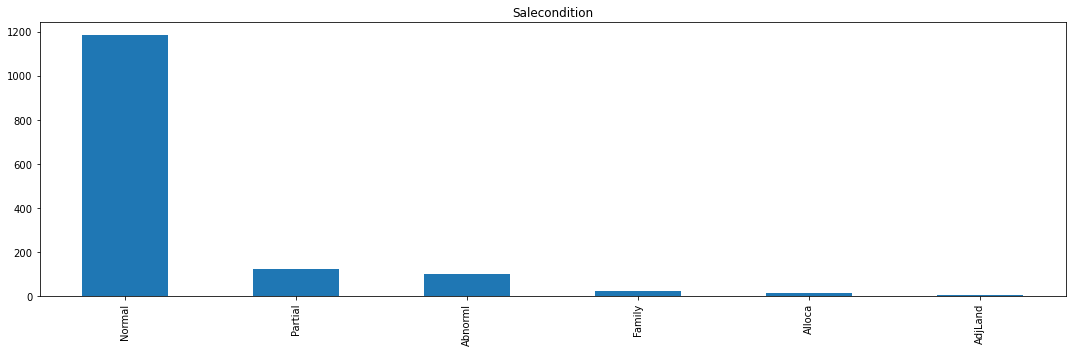

In [21]:
#Plotting all Object columns bar graphs
nrow = indx = 1

def plotBarChart(i):
    plt.figure(figsize=(15, 5))
    plt.subplot(1,1,1)
    ax = data[i].value_counts().plot.bar()
    ax.set_title(i.title())
    plt.tight_layout()
    plt.show()

for i in data.select_dtypes(include=['object']):
    plotBarChart(i)

In [22]:
#Street,Utilities,Condition2,Roofmatl,Heating columns has low variance based on box plot. We can drop
object_columns=['Street','Utilities','Condition2','RoofMatl','Heating']
data.drop(object_columns,axis=1,inplace = True)

In [23]:
#Based on data description below columns are ordinal
ordinal_columns = ['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir', 'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']
data[ordinal_columns].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [24]:
data['LandSlope'] = data.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
data['ExterQual'] = data.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data['BsmtQual'] = data.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['BsmtCond'] = data.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['BsmtExposure'] = data.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
data['BsmtFinType1'] = data.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
data['BsmtFinType2'] = data.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
data['HeatingQC'] = data.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data['CentralAir'] = data.CentralAir.map({'N':0,'Y':1})
data['KitchenQual'] = data.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data['GarageFinish'] = data.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
data['GarageQual'] = data.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['GarageCond'] = data.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['ExterCond'] = data.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data['LotShape'] = data.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [25]:
#check ordinal columns value set properly
data[ordinal_columns].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


In [26]:
#Columns which needs dummy based on data description
dummy_columns = ['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition','FireplaceQu']

In [27]:
#Create dummies
dummy_col_data = pd.get_dummies(data[dummy_columns],drop_first=True)

#Concat dummies
data = pd.concat([data,dummy_col_data],axis=1)

#Drop original columns
data.drop(dummy_columns,axis=1,inplace = True)

#Check all columns are in int/float 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1441 entries, 0 to 1459
Columns: 184 entries, MSSubClass to FireplaceQu_TA
dtypes: float64(3), int64(48), uint8(133)
memory usage: 772.6 KB


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

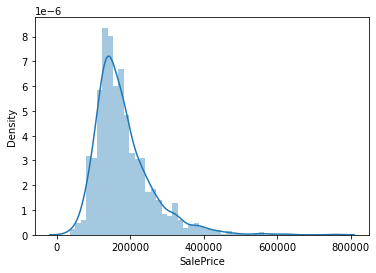

In [28]:
#check SalesPrice target variable
sns.distplot(data["SalePrice"])

In [29]:
#Check data for number columns
data.select_dtypes(include=['number']).describe()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA
count,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.0,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1

In [30]:
#Create train and test data
df_train,df_test = train_test_split(data, train_size=0.7,test_size = 0.3, random_state=100)

In [31]:
#Scaling the data since the numbers are not consistent for all number columns
scaler = StandardScaler()
num_col = df_train.select_dtypes(include=['number']).columns
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

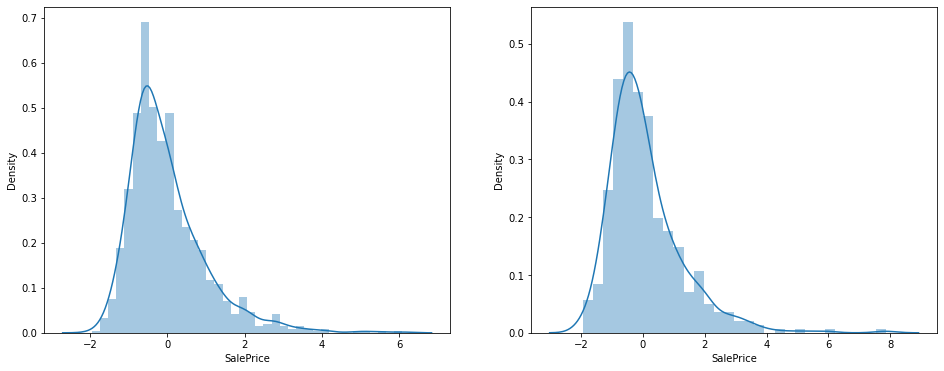

In [32]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

In [33]:
#Linear regression
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

In [34]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [35]:
# Calculating the RFE
#using number of columns = 15.Based on multiple combinations of data.
rfe = RFE(reg, 20)
rfe = rfe.fit(X_train, y_train)

In [36]:
col=X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtExposure',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BedroomAbvGr', 'KitchenQual', 'GarageArea', 'YearBuilt_age',
       'GarageYrBlt_age', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'GarageType_NA', 'SaleType_New', 'SaleCondition_Partial'],
      dtype='object')

In [37]:
X_train_rfe=X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
X_test_rfe=X_test[col]
X_test_rfe = sm.add_constant(X_test_rfe,has_constant='add')
#create first model
lr=sm.OLS(y_train,X_train_rfe)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     391.2
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:07:32   Log-Likelihood:                -327.03
No. Observations:                1008   AIC:                             696.1
Df Residuals:                     987   BIC:                             799.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.606e-17      0.011   7.14e-15      1.000      -0.021       0.021
MSSubClass               -0.0906      0.013     -7.056      0.000      -0.116      -0.065
LotArea                   0.0941      0.013      7.347      0.000       0.069       0.119
OverallQual               0.2255      0.018     12.321      0.000       0.190       0.261
OverallCond               0.0902      0.012      7.229      0.000       0.066       0.115
BsmtExposure              0.0744      0.012      5.983      0.000       0.050       0.099
BsmtFinSF1                0.1064      0.013      8.407      0.000       0.082       0.131
TotalBsmtSF               0.0826      0.020      4.214      0.000       0.044       0.121
1stFlrSF                  0.1345      0.083      1.630      0.103      -0.027       0.296
2ndFlrSF                  0.2130      0.099      2.157      0.031       0.019       0.407
GrLivArea                 0.2350      0.111      2.112      0.035       0.017       0.453
BedroomAbvGr             -0.0819      0.014     -5.672      0.000      -0.110      -0.054
KitchenQual               0.0749      0.015      4.916      0.000       0.045       0.105
GarageArea                0.0999      0.018      5.417      0.000       0.064       0.136
YearBuilt_age            -0.1631      0.021     -7.692      0.000      -0.205      -0.122
GarageYrBlt_age           0.2962      0.394      0.752      0.452      -0.477       1.069
Neighborhood_NridgHt      0.0907      0.012      7.600      0.000       0.067       0.114
Neighborhood_StoneBr      0.0749      0.011      6.684      0.000       0.053       0.097
GarageType_NA            -0.2529      0.387     -0.654      0.513      -1.012       0.506
SaleType_New              0.2789      0.068      4.089      0.000       0.145       0.413
SaleCondition_Partial    -0.2080      0.068     -3.048      0.002      -0.342      -0.074
==============================================================================
Omnibus:                      277.686   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2095.785
Skew:                           1.049   Prob(JB):                         0.00
Kurtosis:                       9.745   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
    #Calculate the VIFs for the new model    
    vif = pd.DataFrame()
    X_vif = X_train_rfe;
    vif['Features'] = X_vif.columns
    vif['VIF'] = [variance_inflation_factor(X_vif.values,i) for i in range(X_vif.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = "VIF", ascending=False)
    print(vif)

                 Features      VIF
15        GarageYrBlt_age  1366.10
18          GarageType_NA  1317.81
10              GrLivArea   109.03
9                2ndFlrSF    85.88
8                1stFlrSF    60.00
20  SaleCondition_Partial    41.00
19           SaleType_New    40.99
14          YearBuilt_age     3.96
7             TotalBsmtSF     3.39
13             GarageArea     3.00
3             OverallQual     2.95
12            KitchenQual     2.04
11           BedroomAbvGr     1.84
1              MSSubClass     1.45
2                 LotArea     1.44
6              BsmtFinSF1     1.41
4             OverallCond     1.37
5            BsmtExposure     1.36
16   Neighborhood_NridgHt     1.25
17   Neighborhood_StoneBr     1.11
0                   const     1.00


In [39]:
#function to generate model and VIF details

def generateModel(X,field):
    X_train_new = X.drop(field,axis=1)
    # create another model
    X_train_lm = sm.add_constant(X_train_new)
    #create model
    lr = sm.OLS(y_train,X_train_lm)
    #fit
    lr_model = lr.fit()
    #params
    print(lr_model.summary())
    #Calculate the VIFs for the new model    
    vif = pd.DataFrame()
    X_vif = X_train_new;
    vif['Features'] = X_vif.columns
    vif['VIF'] = [variance_inflation_factor(X_vif.values,i) for i in range(X_vif.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = "VIF", ascending=False)
    print(vif)
    return X_train_new,X_train_lm,lr_model

In [40]:
##Model 2

#Remove variables having pvalues > 0.05 and VIF > 5
X_train_rfe.drop('const',axis=1,inplace=True)
X_train_new,X_train_lm,lr_model = generateModel(X_train_rfe,'GarageType_NA')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     412.0
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:07:32   Log-Likelihood:                -327.25
No. Observations:                1008   AIC:                             694.5
Df Residuals:                     988   BIC:                             792.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.606e-

In [41]:
X_train_new,X_train_lm,lr_model = generateModel(X_train_new,'1stFlrSF')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     433.8
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:07:32   Log-Likelihood:                -328.83
No. Observations:                1008   AIC:                             695.7
Df Residuals:                     989   BIC:                             789.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.606e-

In [42]:
X_train_new,X_train_lm,lr_model = generateModel(X_train_new,'GarageYrBlt_age')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     455.9
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:07:32   Log-Likelihood:                -332.55
No. Observations:                1008   AIC:                             701.1
Df Residuals:                     990   BIC:                             789.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.606e-

In [43]:
X_train_new,X_train_lm,lr_model = generateModel(X_train_new,'GrLivArea')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     376.1
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:07:32   Log-Likelihood:                -444.38
No. Observations:                1008   AIC:                             922.8
Df Residuals:                     991   BIC:                             1006.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.606e-

In [44]:
X_train_new,X_train_lm,lr_model = generateModel(X_train_new,'BedroomAbvGr')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     401.6
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:07:32   Log-Likelihood:                -444.38
No. Observations:                1008   AIC:                             920.8
Df Residuals:                     992   BIC:                             999.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.606e-

In [45]:
X_train_new,X_train_lm,lr_model = generateModel(X_train_new,'SaleCondition_Partial')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     427.4
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:07:32   Log-Likelihood:                -447.67
No. Observations:                1008   AIC:                             925.3
Df Residuals:                     993   BIC:                             999.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.606e-17 

In [46]:
X_train_lm.columns

Index(['const', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'KitchenQual',
       'GarageArea', 'YearBuilt_age', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'SaleType_New'],
      dtype='object')

In [47]:
#Since pvalues < 0.05 and VIF < 5 we will consider model as final model

X_test_new = X_test[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'KitchenQual',
       'GarageArea', 'YearBuilt_age', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'SaleType_New']]
X_test_new = sm.add_constant(X_test_new,has_constant='add')

In [48]:
y_pred_train = lr_model.predict(X_train_lm)
y_pred_test = lr_model.predict(X_test_new)

In [49]:
def calculateMetrics(y_train,y_pred_train,y_test,y_pred_test):
    metric = []
    r2_train_lr = r2_score(y_train, y_pred_train)
    print("r2_train : ",r2_train_lr)
    metric.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_pred_test)
    print("r2_test : ",r2_test_lr)
    metric.append(r2_test_lr)

    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    print("rss1_train : ",rss1_lr)
    metric.append(rss1_lr)

    rss2_lr = np.sum(np.square(y_test - y_pred_test))
    print("rss2_test : ",rss2_lr)
    metric.append(rss2_lr)

    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print("mse_train : ",mse_train_lr)
    metric.append(mse_train_lr**0.5)

    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    print("mse_test : ",mse_test_lr)
    metric.append(mse_test_lr**0.5)
    return metric

In [50]:
metric = calculateMetrics(y_train,y_pred_train,y_test,y_pred_test)

r2_train :  0.8576749168226148
r2_test :  0.8172575158024807
rss1_train :  143.46368384280424
rss2_test :  112.2561192990664
mse_train :  0.14232508317738515
mse_test :  0.259252007619091


In [51]:
#Ridge Regression

#For Ridge and Lasso we will take all 170 colums to check the behaviour.

In [52]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = KFold(n_splits=10,shuffle=True,random_state=100)
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [53]:
# Printing the best hyperparameter alpha
print(model_cv_ridge.best_params_)

{'alpha': 100}


In [54]:
cv_result_r = pd.DataFrame(model_cv_ridge.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.010084,0.003985,0.004320,0.001248,0.0001,{'alpha': 0.0001},0.867320,0.807384,0.855589,0.914002,0.868230,0.875967,0.888926,0.872392,0.894367,0.904866,0.874904,0.028361,27,0.933769,0.934992,0.934378,0.930935,0.932341,0.932645,0.931212,0.935594,0.933730,0.932124,0.933172,0.001490
1,0.007442,0.000351,0.003623,0.000199,0.0010,{'alpha': 0.001},0.867326,0.807381,0.855587,0.914008,0.868229,0.875972,0.888989,0.872403,0.894367,0.904869,0.874913,0.028366,26,0.933769,0.934992,0.934378,0.930935,0.932341,0.932645,0.931212,0.935594,0.933730,0.932124,0.933172,0.001490
2,0.007397,0.000467,0.003604,0.000218,0.0100,{'alpha': 0.01},0.867385,0.807354,0.855567,0.914056,0.868214,0.876024,0.889593,0.872508,0.894364,0.904895,0.874996,0.028411,25,0.933768,0.934992,0.934378,0.930935,0.932340,0.932645,0.931212,0.935594,0.933730,0.932123,0.933172,0.001490
3,0.007422,0.000434,0.003643,0.000297,0.0500,{'alpha': 0.05},0.867605,0.807268,0.855492,0.914222,0.868139,0.876197,0.891861,0.872956,0.894353,0.904981,0.875307,0.028584,24,0.933764,0.934990,0.934376,0.930930,0.932337,0.932641,0.931207,0.935590,0.933726,0.932119,0.933168,0.001491
4,0.007309,0.000250,0.003695,0.000229,0.1000,{'alpha': 0.1},0.867814,0.807216,0.855418,0.914358,0.868037,0.876330,0.893988,0.873476,0.894339,0.905047,0.875602,0.028749,23,0.933756,0.934986,0.934371,0.930920,0.932330,0.932632,0.931196,0.935583,0.933719,0.932110,0.933160,0.001493


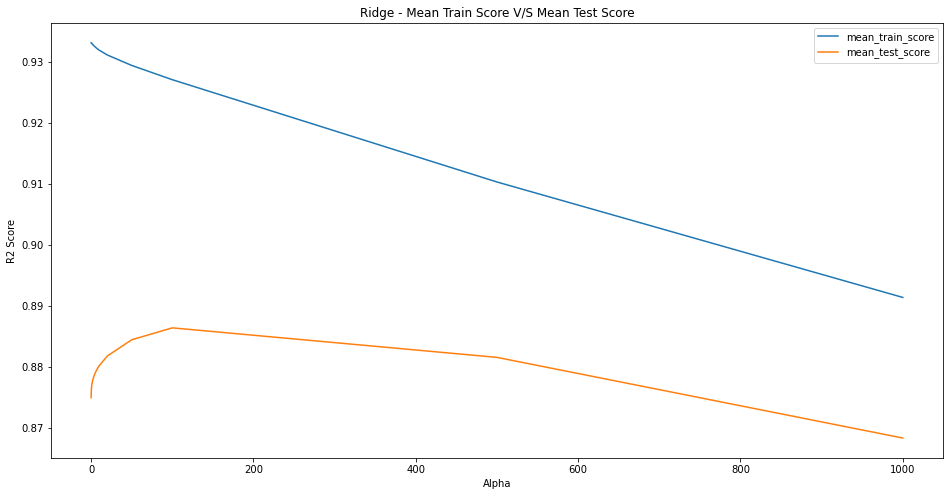

In [55]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.legend(['mean_train_score','mean_test_score'])
plt.title("Ridge - Mean Train Score V/S Mean Test Score")
plt.show()

In [56]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=100)

In [57]:
ridge.coef_

array([-0.04558544,  0.00983455,  0.10032465,  0.01402435, -0.00913945,
        0.12767946,  0.0626049 ,  0.06287043,  0.04359643, -0.00598501,
        0.049503  , -0.01724083,  0.07716048,  0.02062314,  0.0668175 ,
       -0.00667345,  0.00136014,  0.00659526,  0.07846789,  0.01169262,
        0.01237215,  0.08475479,  0.09387467,  0.00405477,  0.14426518,
        0.03408013, -0.01165839,  0.04453659,  0.02928178, -0.03041518,
       -0.02855739,  0.05153679,  0.04875676,  0.0218118 , -0.00031585,
        0.03505956,  0.06908813,  0.03298609, -0.01745557,  0.02774893,
        0.02789388,  0.0013184 ,  0.01790348,  0.03825909,  0.        ,
        0.00037794, -0.05687856, -0.0263377 ,  0.01810474,  0.00038094,
        0.01203035,  0.00890285,  0.02449799,  0.00095117,  0.03115507,
       -0.02085788, -0.00489849,  0.03229352, -0.00324615, -0.01098712,
        0.01168362,  0.00237624,  0.00609707,  0.02189266, -0.01082836,
       -0.02936171,  0.03820034, -0.02415371, -0.02904004, -0.00

In [58]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = calculateMetrics(y_train,y_pred_train,y_test,y_pred_test)

r2_train :  0.9259065897346783
r2_test :  0.8387078924270227
rss1_train :  74.6861575474442
rss2_test :  99.07945680622296
mse_train :  0.07409341026532162
mse_test :  0.22882091641160038


In [59]:
#Lasso regression

lasso = Lasso()

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [60]:
cv_result_l = pd.DataFrame(model_cv_lasso.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.169835,0.010393,0.003840,0.000283,0.0001,{'alpha': 0.0001},0.869302,0.807990,0.854694,0.914317,0.866447,0.876857,0.903250,0.876834,0.894320,0.905640,0.876965,0.029381,3,0.933588,0.934855,0.934261,0.930738,0.932207,0.932461,0.930968,0.935387,0.933547,0.931950,0.932996,0.001505
1,0.092653,0.027690,0.003603,0.000115,0.0010,{'alpha': 0.001},0.875927,0.821039,0.856206,0.915792,0.872180,0.877324,0.914898,0.889222,0.894083,0.908227,0.882490,0.027649,2,0.931961,0.933226,0.932642,0.929193,0.930874,0.931049,0.929165,0.932935,0.931702,0.930289,0.931304,0.001380
2,0.015788,0.001334,0.003676,0.000156,0.0100,{'alpha': 0.01},0.881838,0.821579,0.885484,0.912536,0.883777,0.900536,0.927238,0.883460,0.887206,0.915510,0.889916,0.027412,1,0.919189,0.920631,0.919432,0.915935,0.918794,0.918240,0.914905,0.919449,0.918945,0.917076,0.918260,0.001676
3,0.009403,0.000333,0.003647,0.000295,0.0500,{'alpha': 0.05},0.873311,0.791742,0.885385,0.872880,0.869304,0.849479,0.888695,0.826835,0.829631,0.892806,0.858007,0.031186,4,0.877217,0.881714,0.874558,0.873347,0.877210,0.876611,0.869985,0.873027,0.873631,0.872372,0.874967,0.003134
4,0.008796,0.000790,0.003699,0.000333,0.1000,{'alpha': 0.1},0.842574,0.785310,0.861580,0.836870,0.848860,0.821910,0.850287,0.779851,0.768523,0.854596,0.825036,0.032689,5,0.838002,0.844418,0.836458,0.833619,0.838207,0.840563,0.830525,0.837023,0.833450,0.831142,0.836341,0.004079


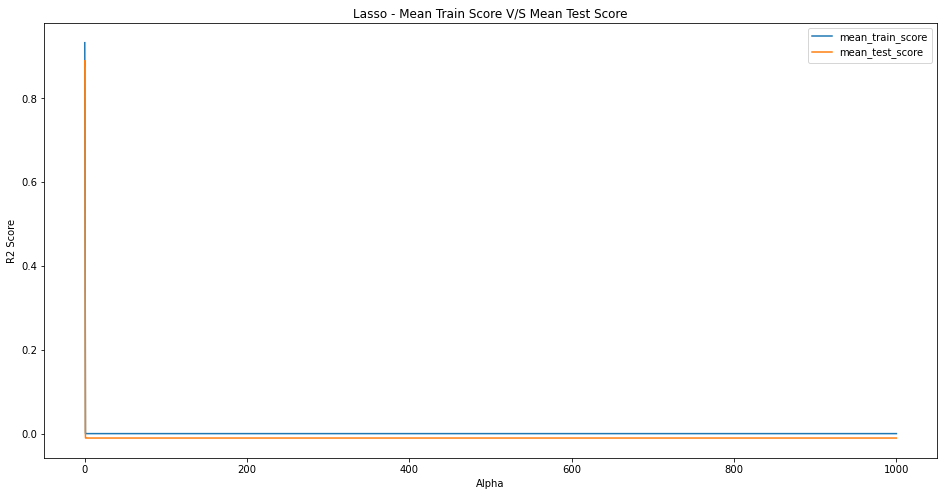

In [61]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.legend(['mean_train_score','mean_test_score'])
plt.title("Lasso - Mean Train Score V/S Mean Test Score")
plt.show()

In [62]:
# Printing the best hyperparameter alpha
print(model_cv_lasso.best_params_)

{'alpha': 0.01}


In [63]:
#Fitting Ridge model for alpha = 0.01 and printing coefficients which have been penalised

alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [64]:
lasso.coef_

array([-0.07036286,  0.00240405,  0.09814606,  0.        , -0.        ,
        0.17242031,  0.05037031,  0.05319779,  0.05182775, -0.        ,
        0.02296158, -0.        ,  0.06727689,  0.00415665,  0.07787462,
       -0.        , -0.        ,  0.        ,  0.06079258,  0.00247024,
        0.        ,  0.        ,  0.        , -0.        ,  0.35606724,
        0.02288691, -0.00489488,  0.00209916,  0.        , -0.02602747,
       -0.01783706,  0.05160678,  0.00982177,  0.        ,  0.        ,
        0.        ,  0.07780886, -0.        , -0.        ,  0.01500506,
        0.01473208, -0.        ,  0.        ,  0.02727143,  0.        ,
       -0.        , -0.07087816, -0.02483539,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.01353403,  0.02768793,
       -0.00839474,  0.        ,  0.01586498, -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.02456492, -0.        ,
       -0.        ,  0.03771572, -0.        , -0.        , -0.  

In [65]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = calculateMetrics(y_train,y_pred_train,y_test,y_pred_test)

r2_train :  0.9168967723700954
r2_test :  0.8400660292149411
rss1_train :  83.7680534509439
rss2_test :  98.24517261687032
mse_train :  0.08310322762990466
mse_test :  0.22689416308746033


In [66]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.857675,0.925907,0.916897
1,R2 Score (Test),0.817258,0.838708,0.840066
2,RSS (Train),143.463684,74.686158,83.768053
3,RSS (Test),112.256119,99.079457,98.245173
4,MSE (Train),0.377260,0.272201,0.288276
5,MSE (Test),0.509168,0.478352,0.476334


In [67]:
## Lets observe the changes in the coefficients after regularization
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Linear'] = lr_model.params
betas['Linear'] = betas['Linear'].fillna(0)
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [68]:
#Top 5 features for Linear
betas.sort_values(by=['Linear'],ascending=False).head(5)

,Linear,Ridge,Lasso
2ndFlrSF,0.306241,0.093875,0.000000
OverallQual,0.279966,0.127679,0.172420
TotalBsmtSF,0.238211,0.078468,0.060793
LotArea,0.141949,0.100325,0.098146
BsmtFinSF1,0.116930,0.066818,0.077875


In [69]:
#Top 5 features for Ridge
betas.sort_values(by=['Ridge'],ascending=False).head(5)

,Linear,Ridge,Lasso
GrLivArea,0.000000,0.144265,0.356067
OverallQual,0.279966,0.127679,0.172420
LotArea,0.141949,0.100325,0.098146
2ndFlrSF,0.306241,0.093875,0.000000
1stFlrSF,0.000000,0.084755,0.000000


In [70]:
#Top 5 features for Lasso
betas.sort_values(by=['Lasso'],ascending=False).head(5)

,Linear,Ridge,Lasso
GrLivArea,0.000000,0.144265,0.356067
OverallQual,0.279966,0.127679,0.172420
LotArea,0.141949,0.100325,0.098146
BsmtFinSF1,0.116930,0.066818,0.077875
GarageArea,0.116133,0.069088,0.077809


In [71]:
print(final_metric)

print("Optimal values for Ridge",model_cv_ridge.best_params_)
print("Optimal values for Lasso",model_cv_lasso.best_params_)

             Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.857675          0.925907          0.916897
1   R2 Score (Test)           0.817258          0.838708          0.840066
2       RSS (Train)         143.463684         74.686158         83.768053
3        RSS (Test)         112.256119         99.079457         98.245173
4       MSE (Train)           0.377260          0.272201          0.288276
5        MSE (Test)           0.509168          0.478352          0.476334
Optimal values for Ridge {'alpha': 100}
Optimal values for Lasso {'alpha': 0.01}


## Based on data comparison and looking at final metrics. 
## Lasso regression performs well then Ridge and Linear regression. 
## Since Lasso will penalise based on data ,it will also help in feature elimination.

In [72]:
#Subjective Question 3
X_train_ex = X_train.drop(['GrLivArea','OverallQual','LotArea','BsmtFinSF1','GarageArea'],axis=1)
X_test_ex = X_test.drop(['GrLivArea','OverallQual','LotArea','BsmtFinSF1','GarageArea'],axis=1)

In [73]:
lasso.fit(X_train_ex, y_train)

Lasso(alpha=0.01)

In [74]:
lasso.coef_

array([-0.06453322,  0.01787597,  0.        , -0.        ,  0.06397544,
        0.05815185,  0.07775892, -0.        ,  0.04450155, -0.00372853,
        0.08726961,  0.01768444, -0.00313969, -0.01241182, -0.03306295,
        0.11709803,  0.        ,  0.        ,  0.28859317,  0.3319907 ,
        0.01757032,  0.03958878, -0.00353698,  0.01967371,  0.00678515,
       -0.03848889, -0.04344056,  0.07436005,  0.04085509,  0.02234667,
        0.        ,  0.08570612,  0.        , -0.        ,  0.02284823,
        0.02461377, -0.        ,  0.00260475,  0.03231084,  0.        ,
        0.        , -0.07737161, -0.01151711,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.01579745,  0.03883821,
        0.        , -0.        ,  0.03182357, -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.01661722,  0.        ,
        0.        ,  0.04111695, -0.00829833, -0.00292623,  0.        ,
       -0.01728782, -0.        , -0.        ,  0.00551564, -0.  

In [75]:
lasso.predict(X_test_ex)

array([ 7.21407907e-01, -9.58844628e-01, -7.27888062e-01, -7.22736251e-01,
       -6.65456396e-01,  1.05821386e+00,  4.65053965e-01, -1.85482170e-01,
        7.91718352e-01, -6.05419170e-01, -1.02495487e+00,  1.03422268e-01,
        8.90121301e-01, -9.36488068e-01, -1.08403178e-01,  2.47316529e+00,
       -4.01126372e-01, -1.83689549e+00,  6.54534699e-01,  1.52470262e-01,
        2.03117565e+00,  6.35696204e-01, -3.29859107e-01,  7.36619792e-01,
        1.62111202e-01,  3.25040395e-01, -6.05479528e-01, -8.77468108e-01,
       -1.15944923e+00,  5.34876107e-01, -3.84180524e-01, -3.25285618e-01,
       -4.56084162e-01, -6.73541576e-01,  5.19390156e-01, -3.96968967e-01,
       -1.33979978e+00, -1.09979978e+00, -1.48530781e+00,  3.24158799e-01,
        2.83363434e-01, -3.31269393e-03, -1.28869489e-02, -2.13422568e-01,
        1.78700417e+00, -8.41022608e-01,  1.52234652e-01,  7.18310636e-01,
        6.21657716e-01, -9.61914726e-01, -4.91918953e-01, -2.49836158e-01,
        2.08627098e+00, -

In [76]:
metric4 = calculateMetrics(y_train,y_pred_train,y_test,y_pred_test)

r2_train :  0.9168967723700954
r2_test :  0.8400660292149411
rss1_train :  83.7680534509439
rss2_test :  98.24517261687032
mse_train :  0.08310322762990466
mse_test :  0.22689416308746033


In [77]:
betas = pd.DataFrame(index=X_train_ex.columns)
betas.rows = X_train_ex.columns
betas['Lasso_ex'] = lasso.coef_

In [78]:
betas.sort_values(by=['Lasso_ex'],ascending=False).head(5)

,Lasso_ex
2ndFlrSF,0.331991
1stFlrSF,0.288593
TotalBsmtSF,0.117098
Neighborhood_NridgHt,0.092587
BsmtExposure,0.087270
